In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
from datetime import datetime
import esm_simulation, utilities
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import itertools
pv=!{sys.executable} --version
print(pv[0],'numpy ==', np.__version__, 'pyarrow ==',pyarrow.__version__, 'seaborn == ', sns.__version__)

C:\Users\hanisaf\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Python 3.9.7 numpy == 1.23.1 pyarrow == 6.0.1 seaborn ==  0.11.2


In [2]:
# options
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
mpl.rcParams['figure.dpi'] = 300
sns.set_style("ticks")
sns.set_palette("cubehelix")
font_scale = 3
sns.set_context("paper", font_scale=font_scale, rc={"lines.linewidth": 3, 'aspect':1})

In [3]:
def plot_agg(df, ci=None, title = None, legend=True, sharey=False, x='Esm Interactivity', ys=['Performance', 'Adoption',  'Metaknowledge Accuracy'], style='Worker Transparency Preference', hue='Worker Interruption Tolerance'):
    sns.set_context("paper", font_scale=3, rc={"lines.linewidth": 3, 'aspect':1})
    n = len(ys)
    fig, axs = plt.subplots(nrows=1, ncols=n, sharey=sharey)
    fig.set_figwidth(40)
    fig.set_figheight(10)
    for i in range(n):
        ax=sns.lineplot( x=x, y=ys[i], style=style, hue=hue, ci=ci, data=df, legend=legend, ax=axs[i]);       
    if title:
        fig.suptitle(title, fontsize=16)

In [4]:
def plot_agg2(df, ci=None, title = None, legend=True, sharey=False, hue=None,
              x='Esm Interactivity',ys=['Performance', 'Adoption',  'Metaknowledge Accuracy'], 
              col='Worker Interruption Tolerance', style='Worker Transparency Preference'):
    sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2, 'aspect':1})
    # capitalize ESM
    df['ESM Interactivity'] = data['Esm Interactivity']
    x = 'ESM Interactivity'
    n = len(ys)
    for i in range(n):
        sns.relplot(kind="line", x=x, y=ys[i], style=style, hue=hue, ci=ci, col=col, data=df, legend=legend);       
    if title:
        fig.suptitle(title, fontsize=16)

In [5]:
data = pd.read_parquet('esm_simulation.Simulation_main_agg.parquet')
print(data.shape)
print(data.columns)
data.head()

(9720, 20)
Index(['Configuration', 'Run', 'Adoption', 'Esm Interactivity',
       'Initial Esm Adoption', 'Initial Metaknowledge Accuracy',
       'Interruptions', 'Leakiness', 'Metaknowledge Accuracy',
       'Metaknowledge Decay Rate', 'Organization Size', 'Performance',
       'Realized Metaknowledge', 'Seed', 'Simulation Time', 'Time Step',
       'Worker Aspiration', 'Worker Dependency',
       'Worker Interruption Tolerance', 'Worker Transparency Preference'],
      dtype='object')


Configuration  Run  Adoption  Esm Interactivity  Initial Esm Adoption  \
0              0    0     0.790              0.100                 0.800   
1              0    1     0.770              0.100                 0.800   
2              0    2     0.790              0.100                 0.800   
3              0    3     0.820              0.100                 0.800   
4              0    4     0.710              0.100                 0.800   

   Initial Metaknowledge Accuracy  Interruptions  Leakiness  \
0                           0.000          0.000      0.000   
1                           0.000          0.000      0.000   
2                           0.000          0.000      0.000   
3                           0.000          0.000      0.000   
4                           0.000          0.000      0.000   

   Metaknowledge Accuracy  Metaknowledge Decay Rate  Organization Size  \
0                   0.000                     0.000                100   
1                   0.000                     0.000                100   
2                   0.008                     0.000                100   
3                   0.000                     0.000                100   
4                   0.000                     0.000                100   

   Performance  Realized Metaknowledge  Seed  Simulation Time  Time Step  \
0        0.000                     NaN     0               30         30   
1        0.000                     NaN     1               30         30   
2        0.000                   0.000     2               30         30   
3        0.000                     NaN     3               30         30   
4        0.000                     NaN     4               30         30   

   Worker Aspiration  Worker Dependency  Worker Interruption Tolerance  \
0              1.000              0.100                             25   
1              1.000              0.100                             25   
2              1.000              0.100                             25   
3              1.000              0.100                             25   
4              1.000              0.100                             25   

   Worker Transparency Preference  
0                               1  
1                               1  
2                               1  
3                               1  
4                               1

interactivity drives performance up to a point after which it declines
the decline is associated with declined adoption
because interactivity drives interruptions

metaknowledge accuracy 

Transparency preference drives perfornace
interruption tolerance drives adoption

in low transprency preference, performance does not fluctuate with ESM interactivity

adoption curves show an infliction point after which adoption sginicaitly decreases


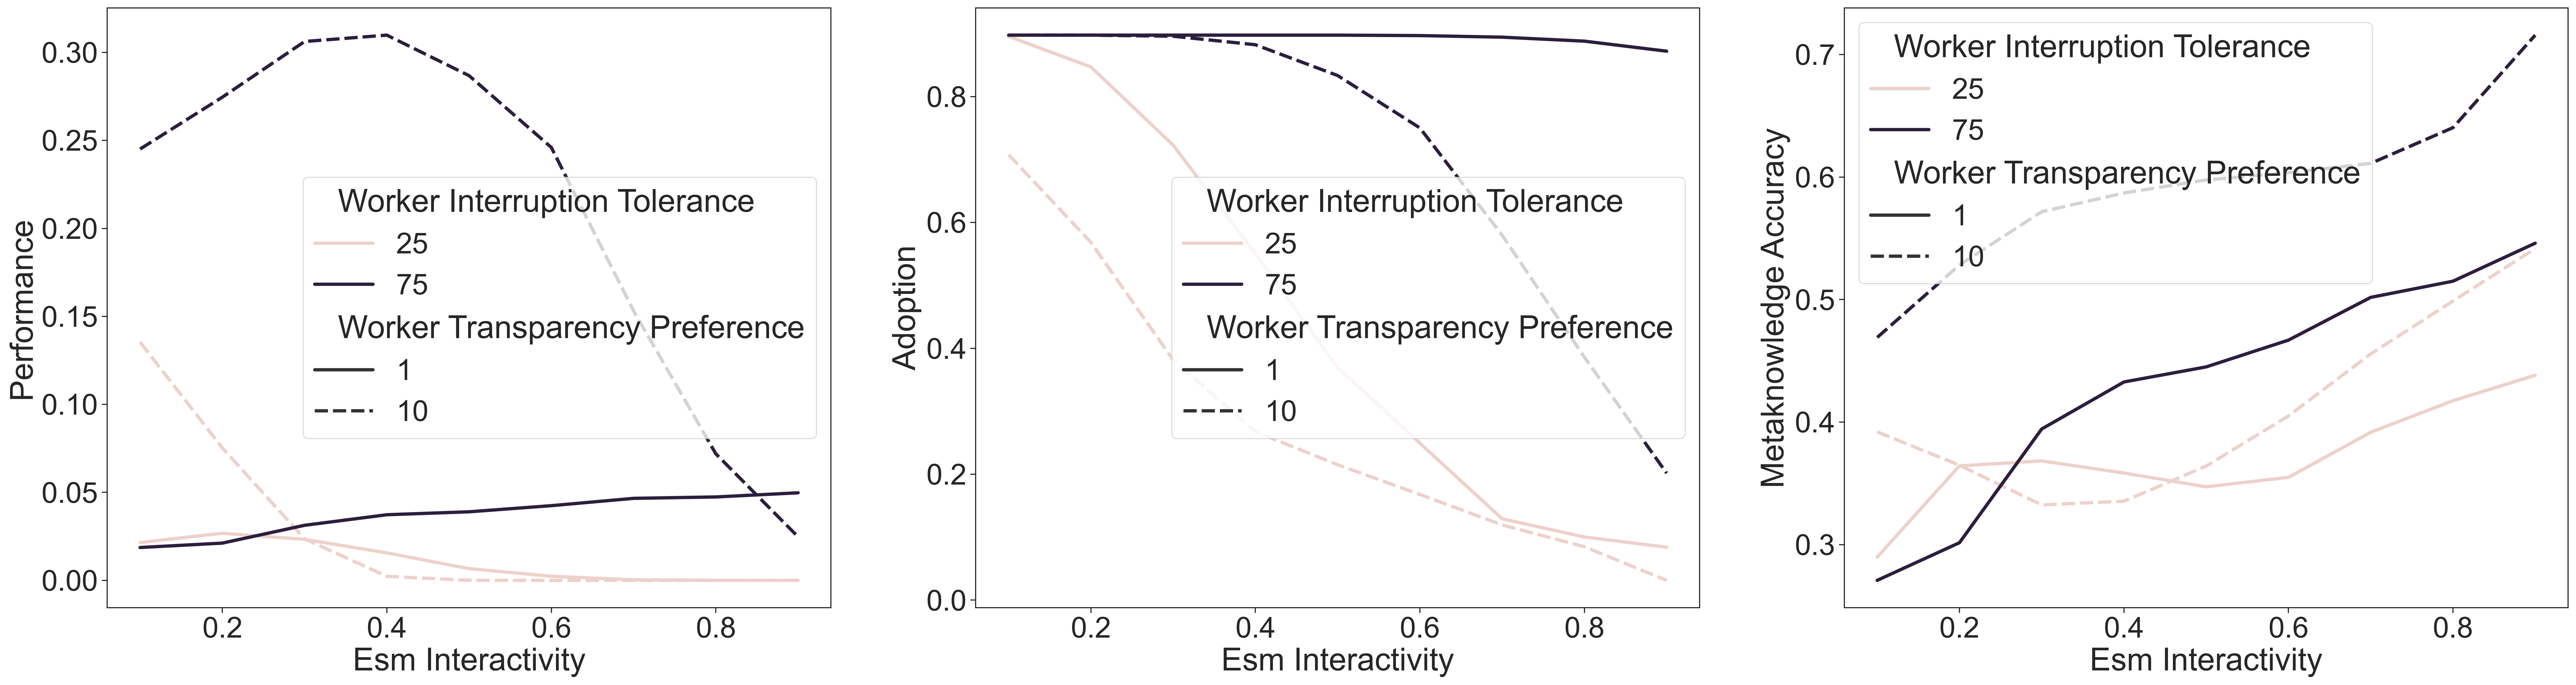

In [6]:
plot_agg(data)

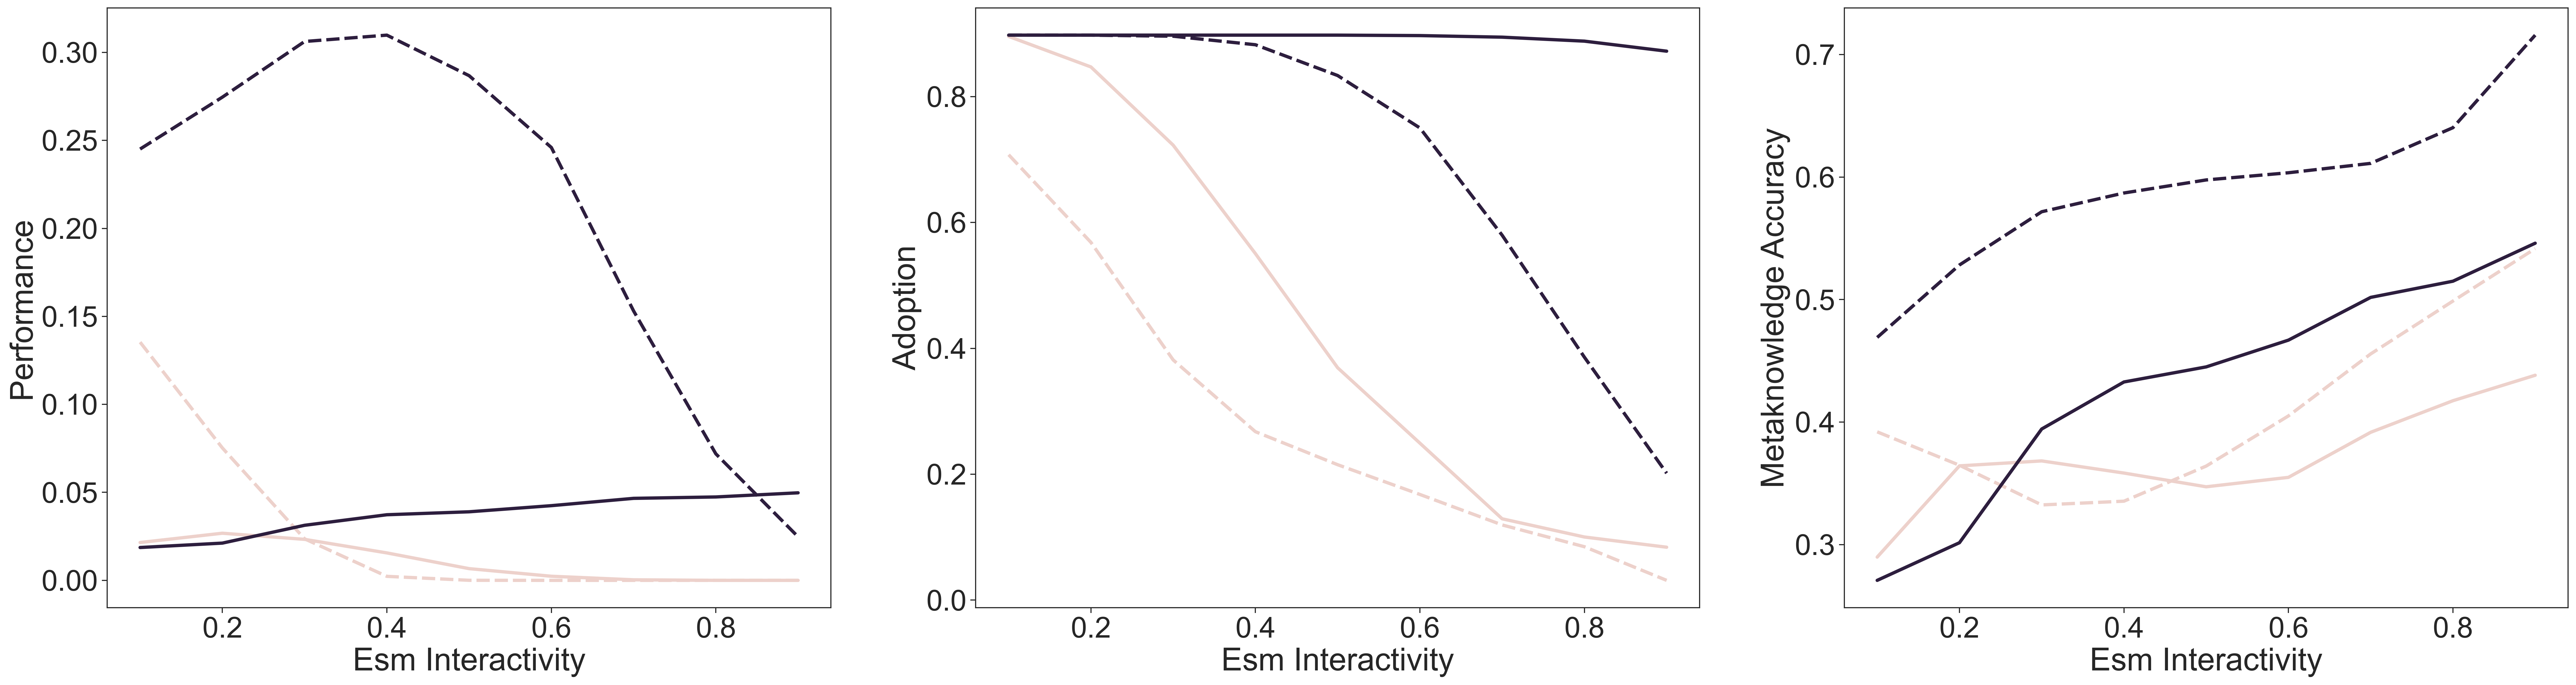

In [7]:
plot_agg(data, legend=False)

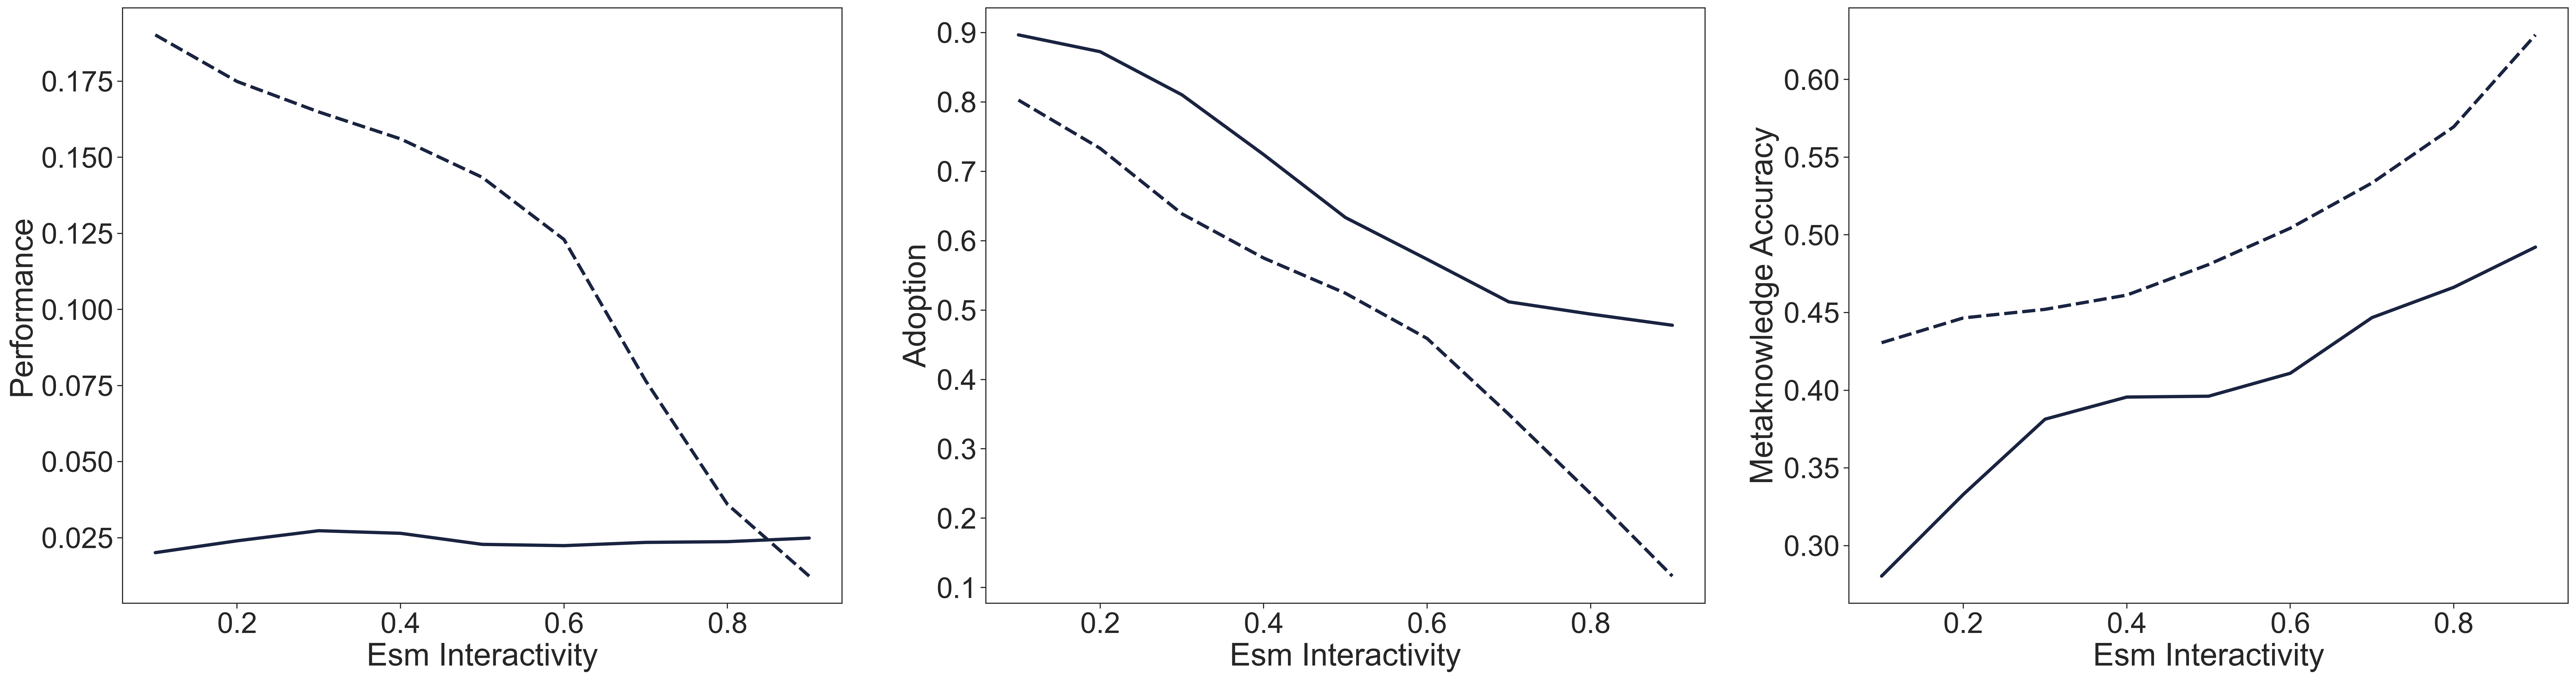

In [8]:
plot_agg(data, hue=None, style='Worker Transparency Preference', legend=False)

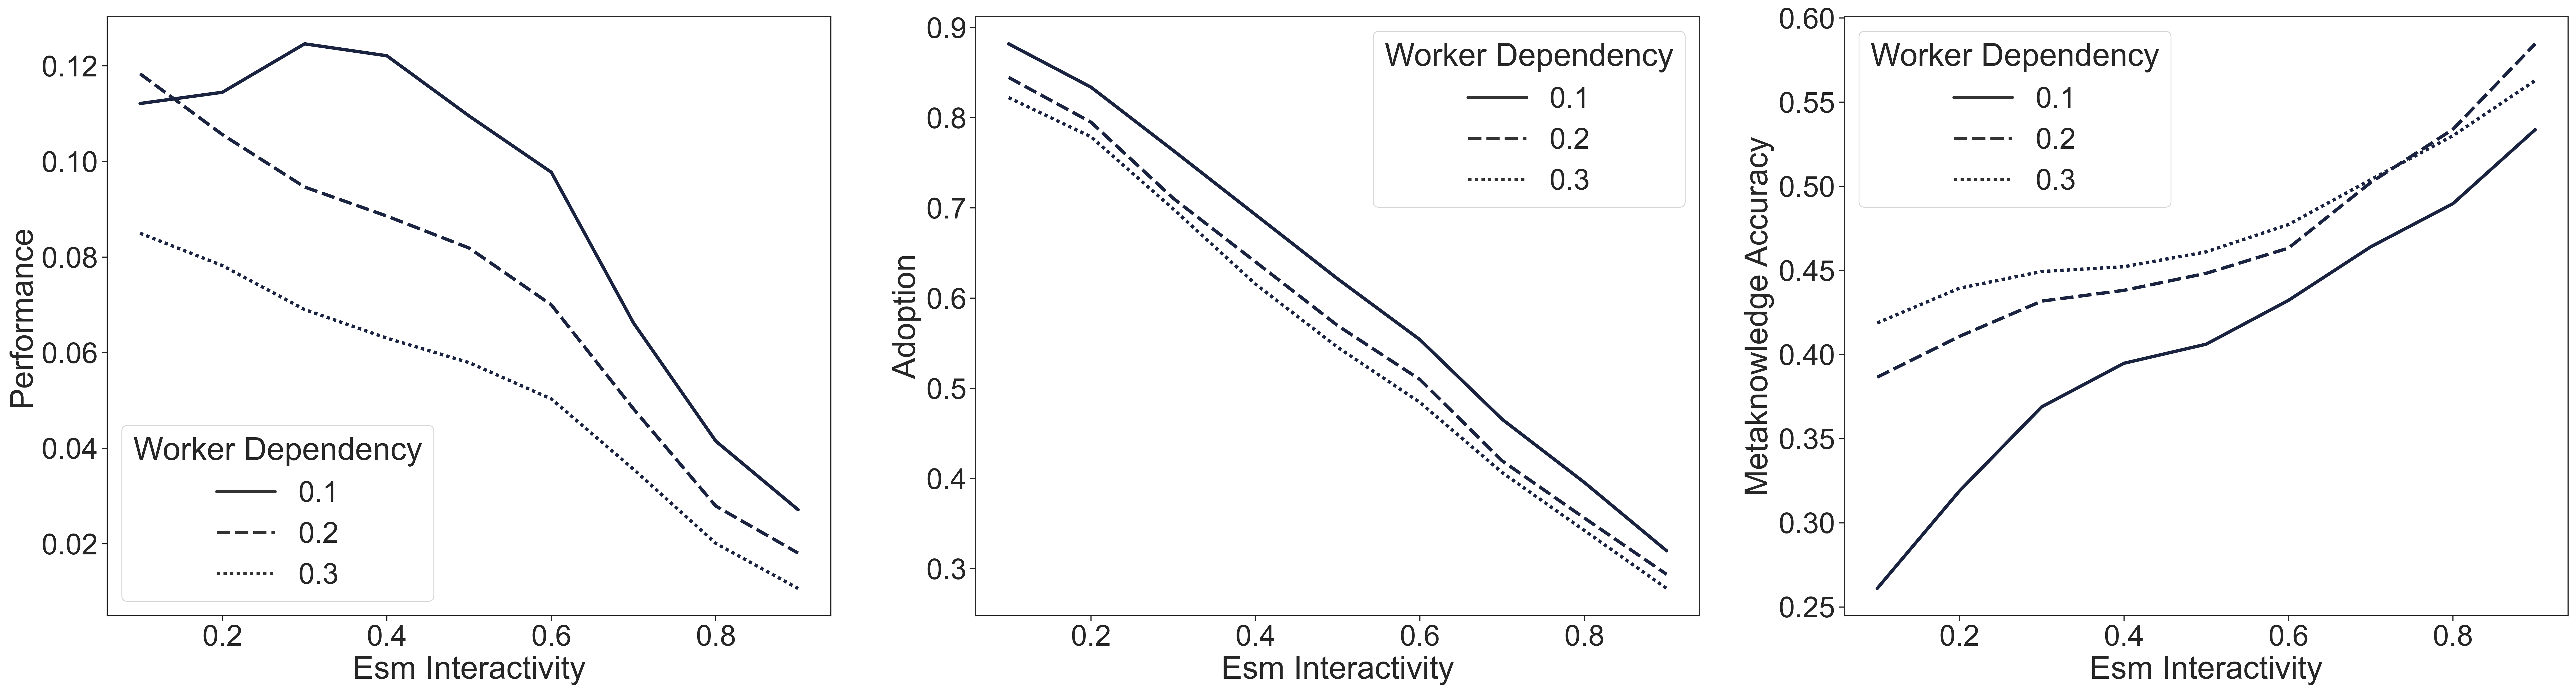

In [9]:
plot_agg(data, style='Worker Dependency', hue=None, legend=True)

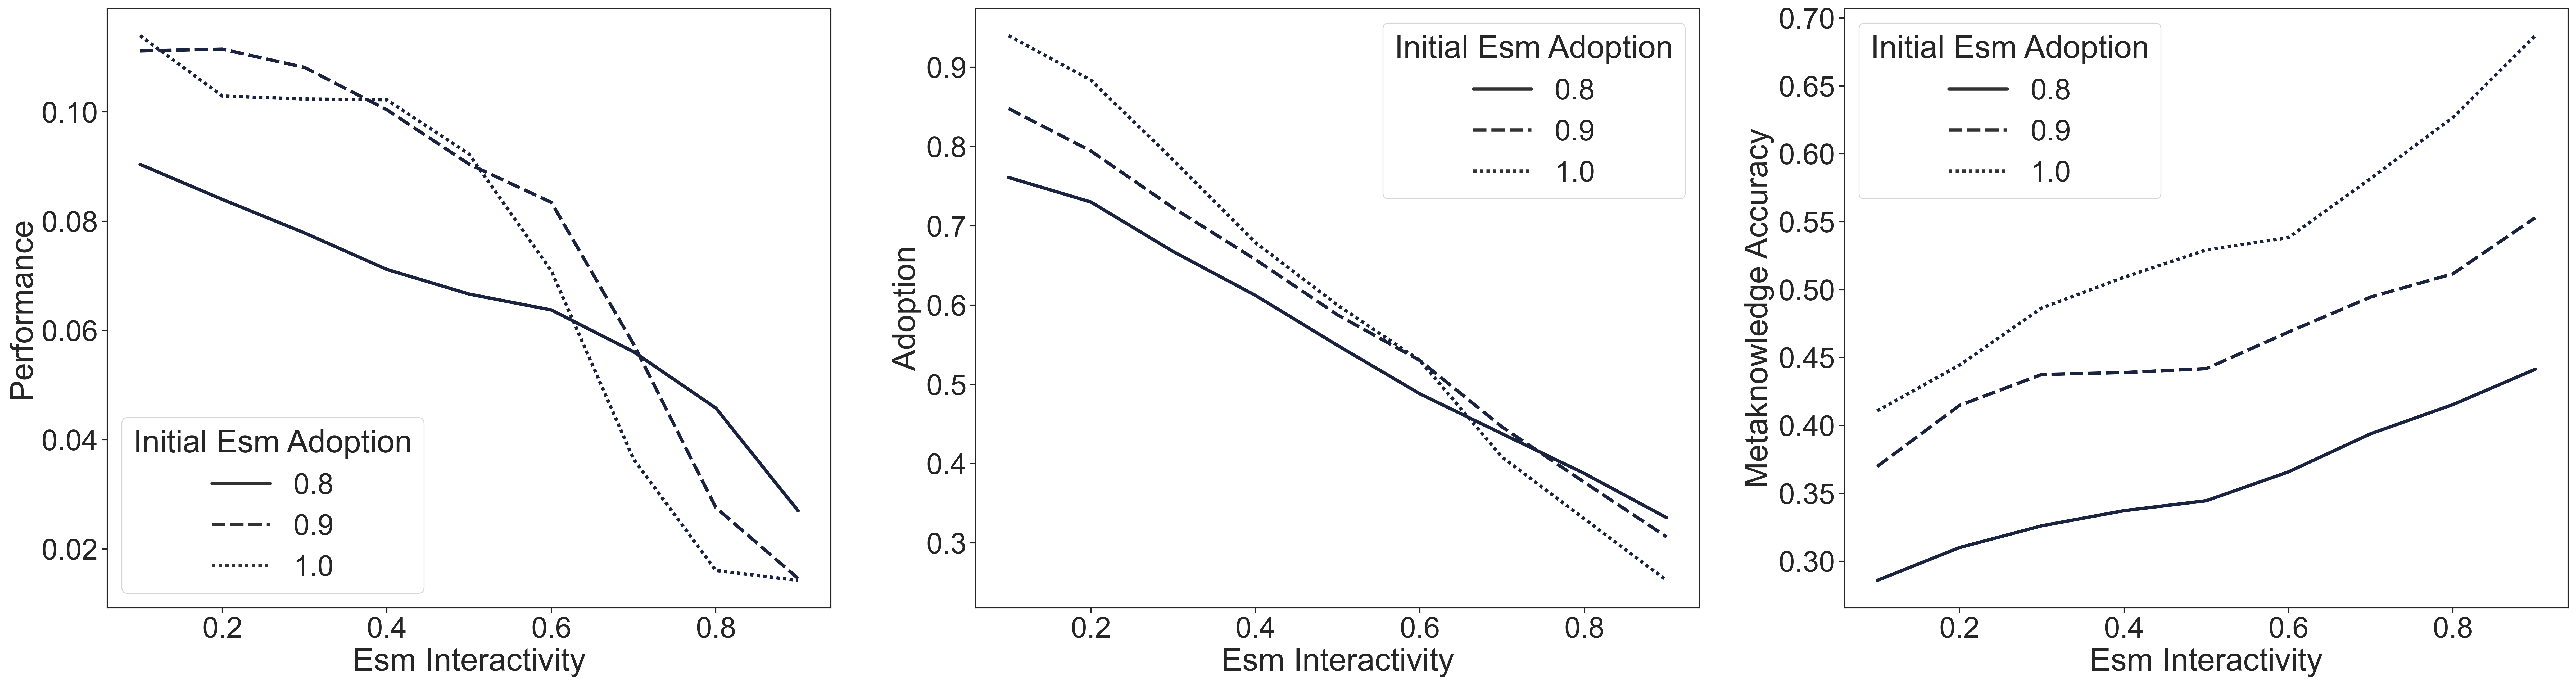

In [10]:
plot_agg(data, style='Initial Esm Adoption', hue=None, legend=True)

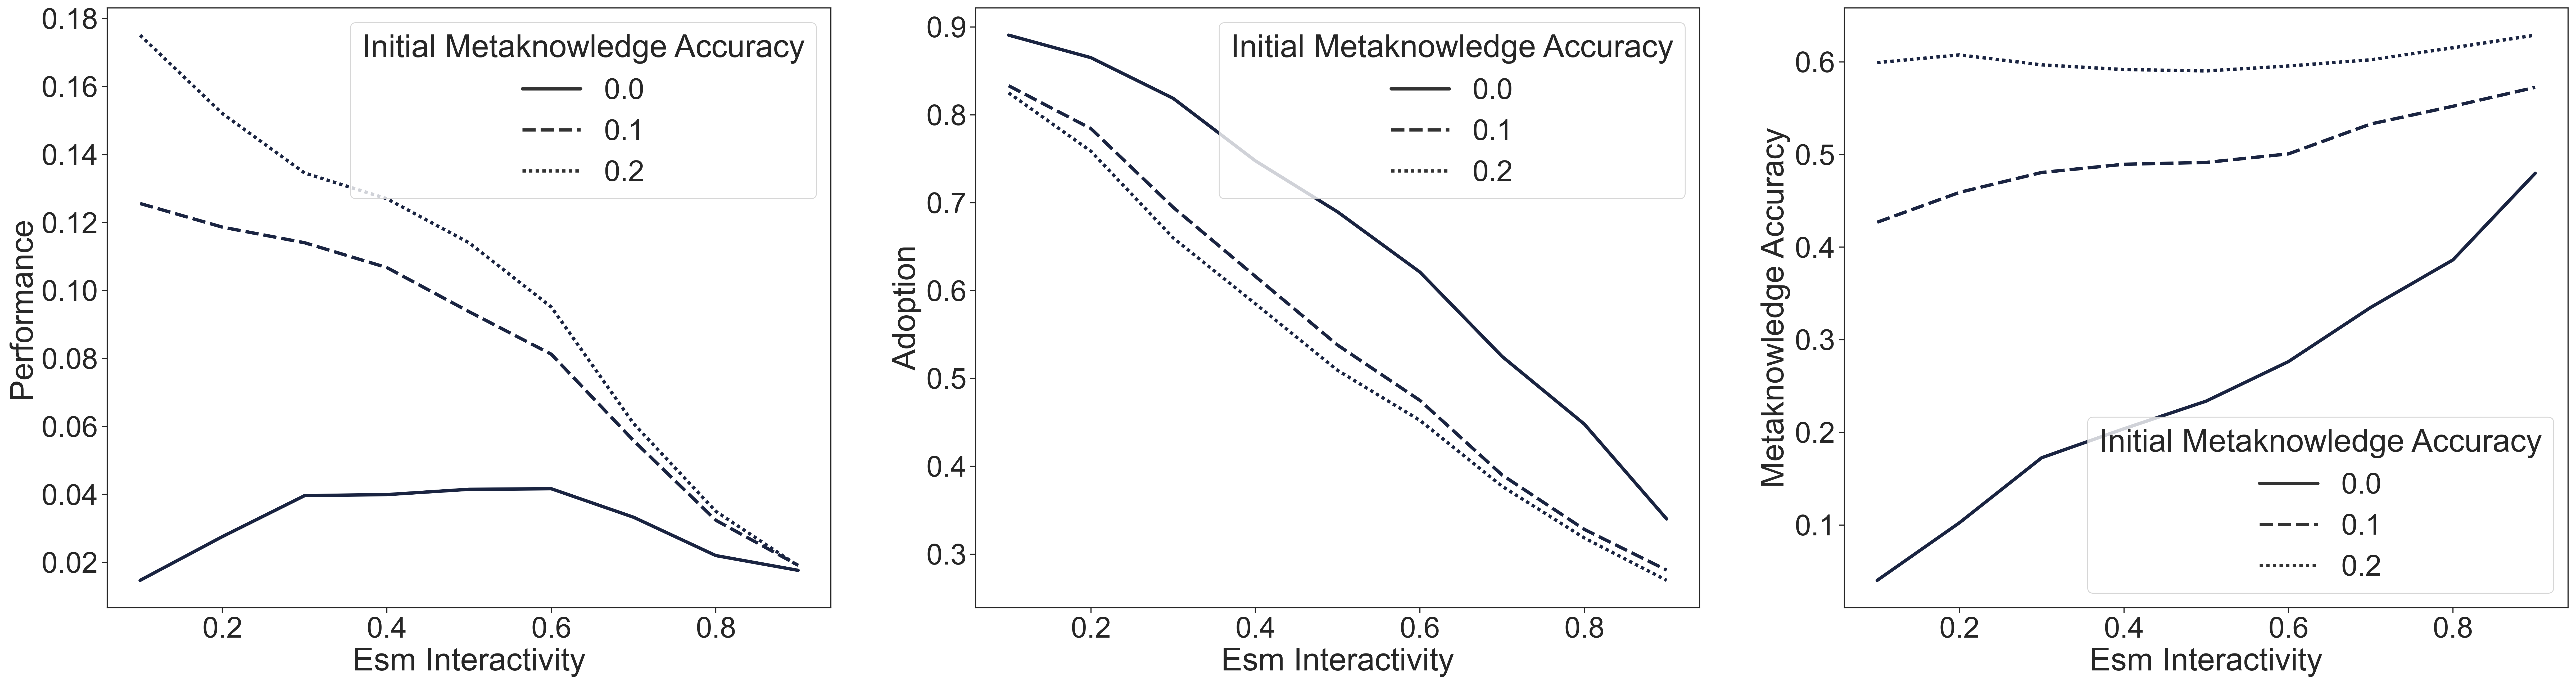

In [11]:
plot_agg(data, style='Initial Metaknowledge Accuracy', hue=None, legend=True)

## figure in paper

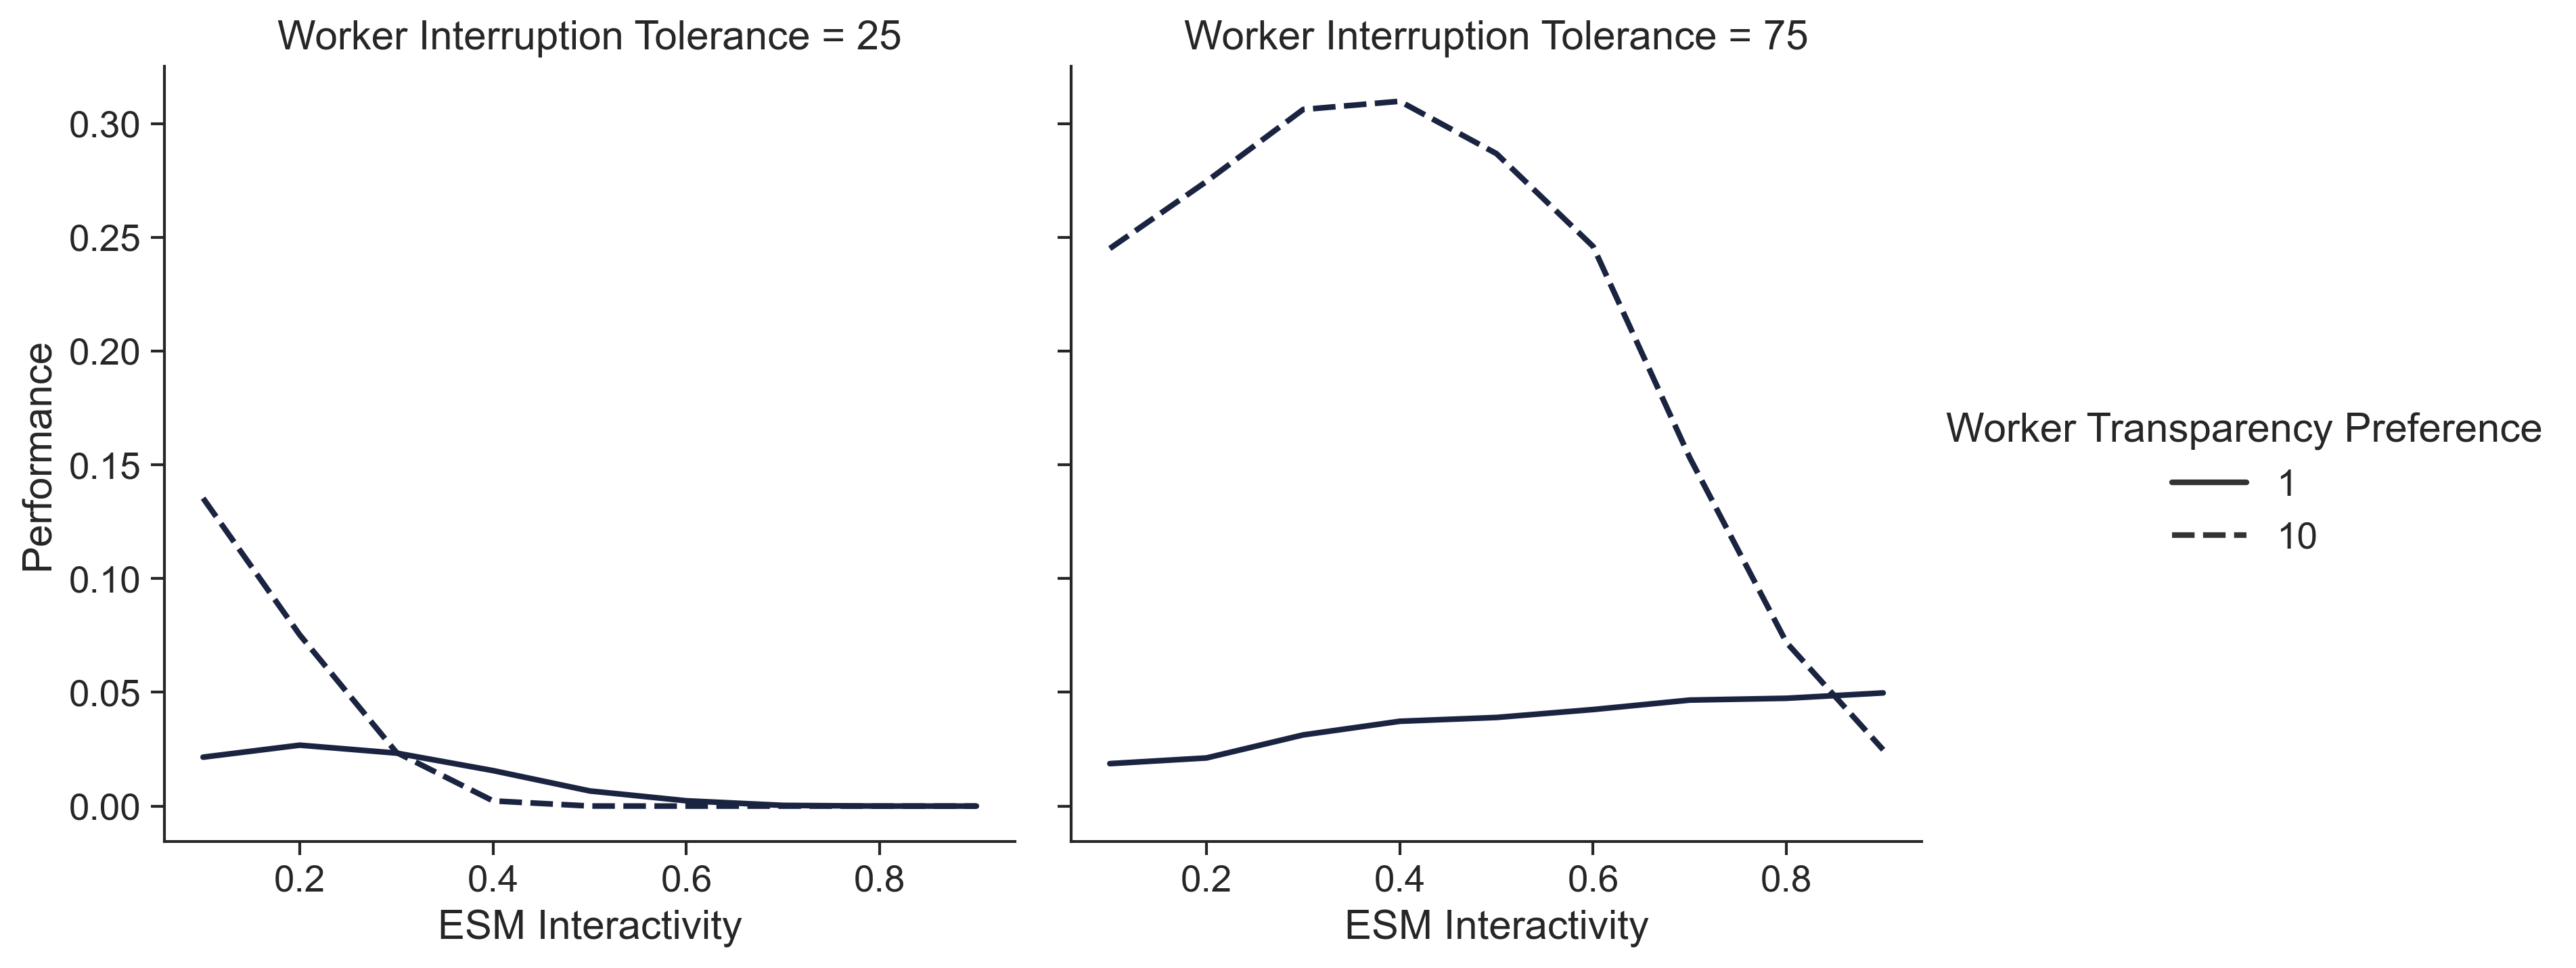

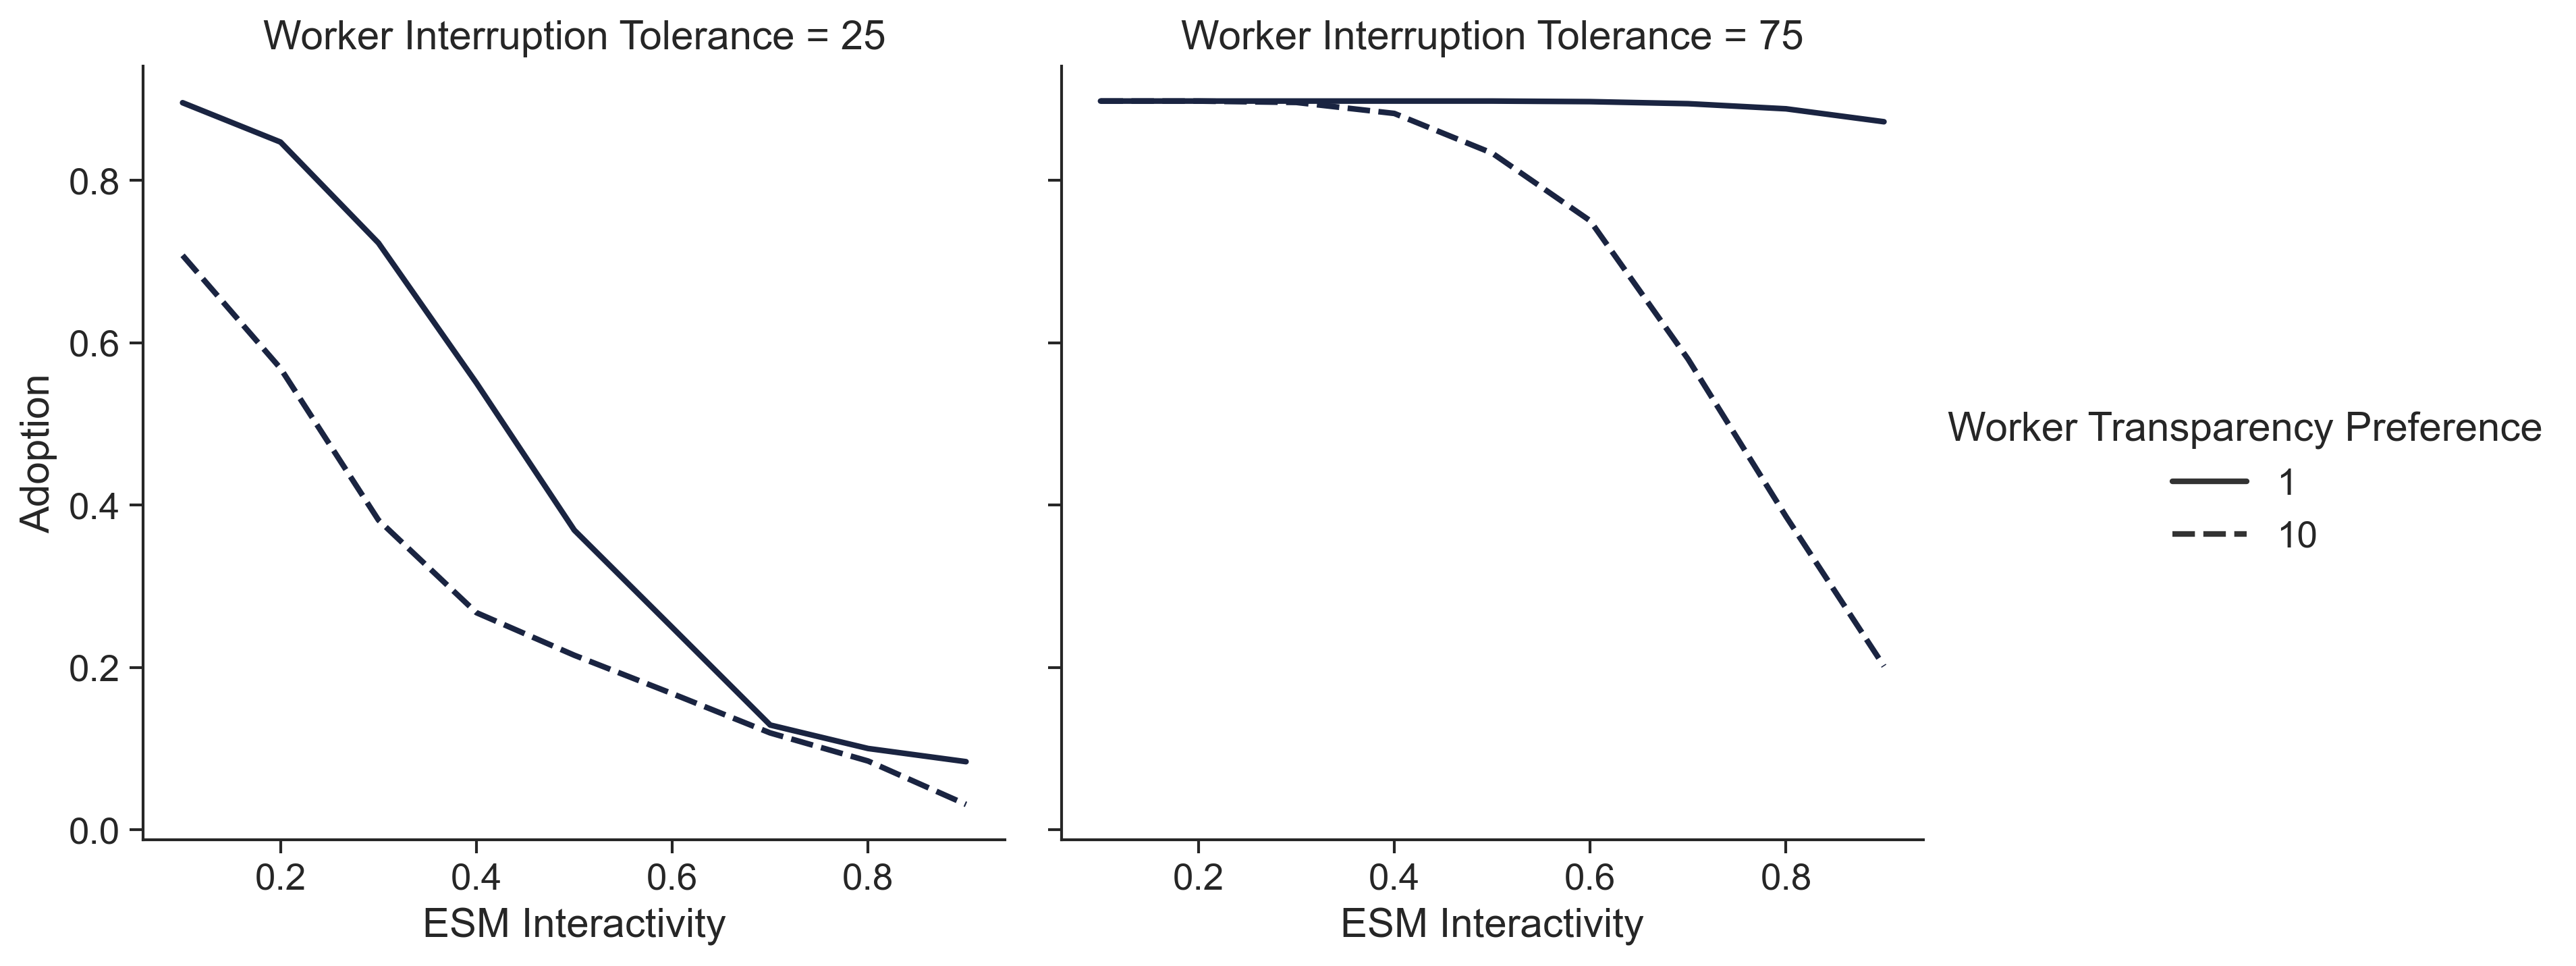

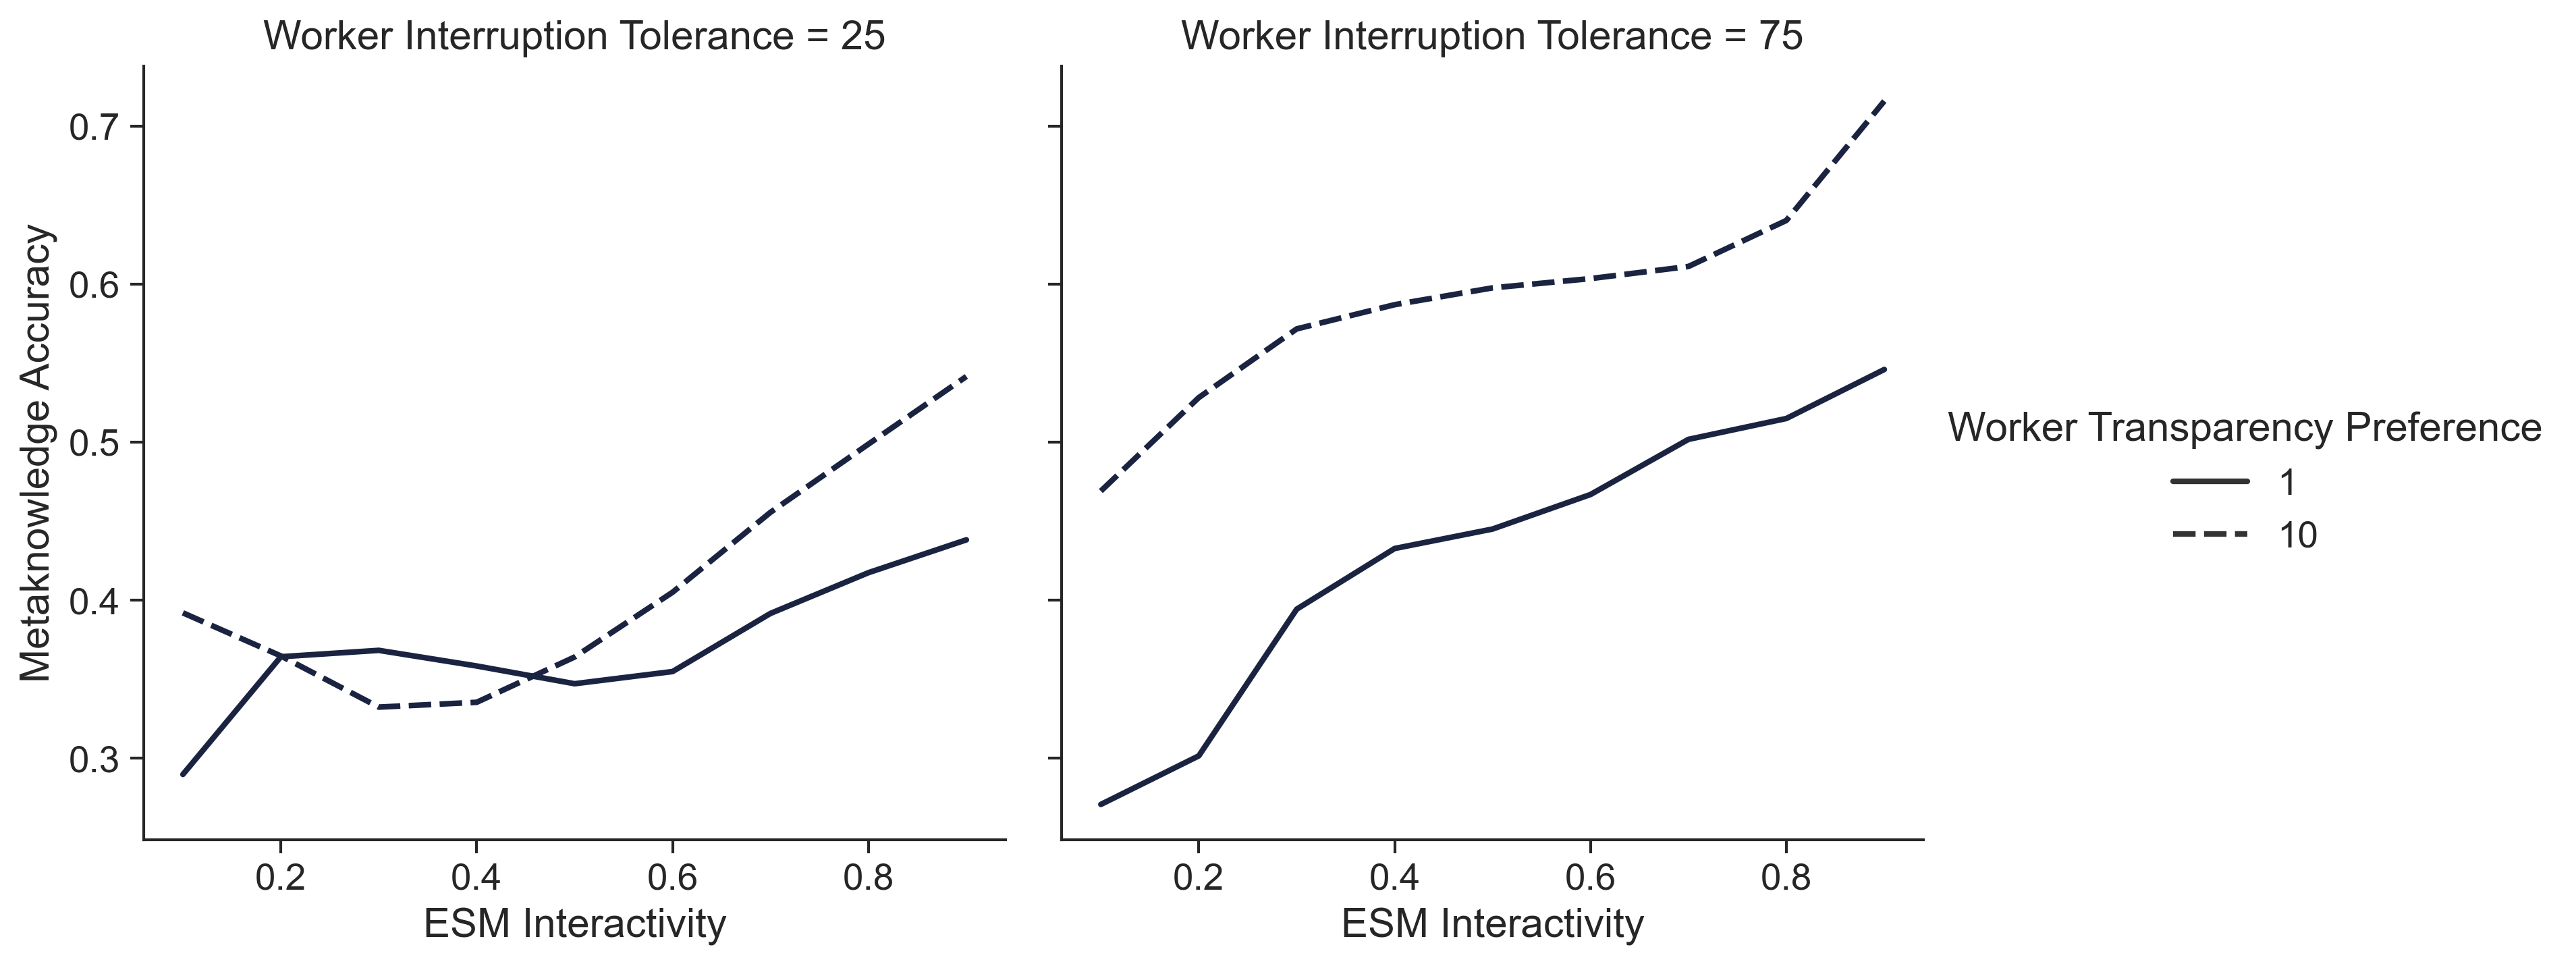

In [12]:
plot_agg2(data, legend=True)

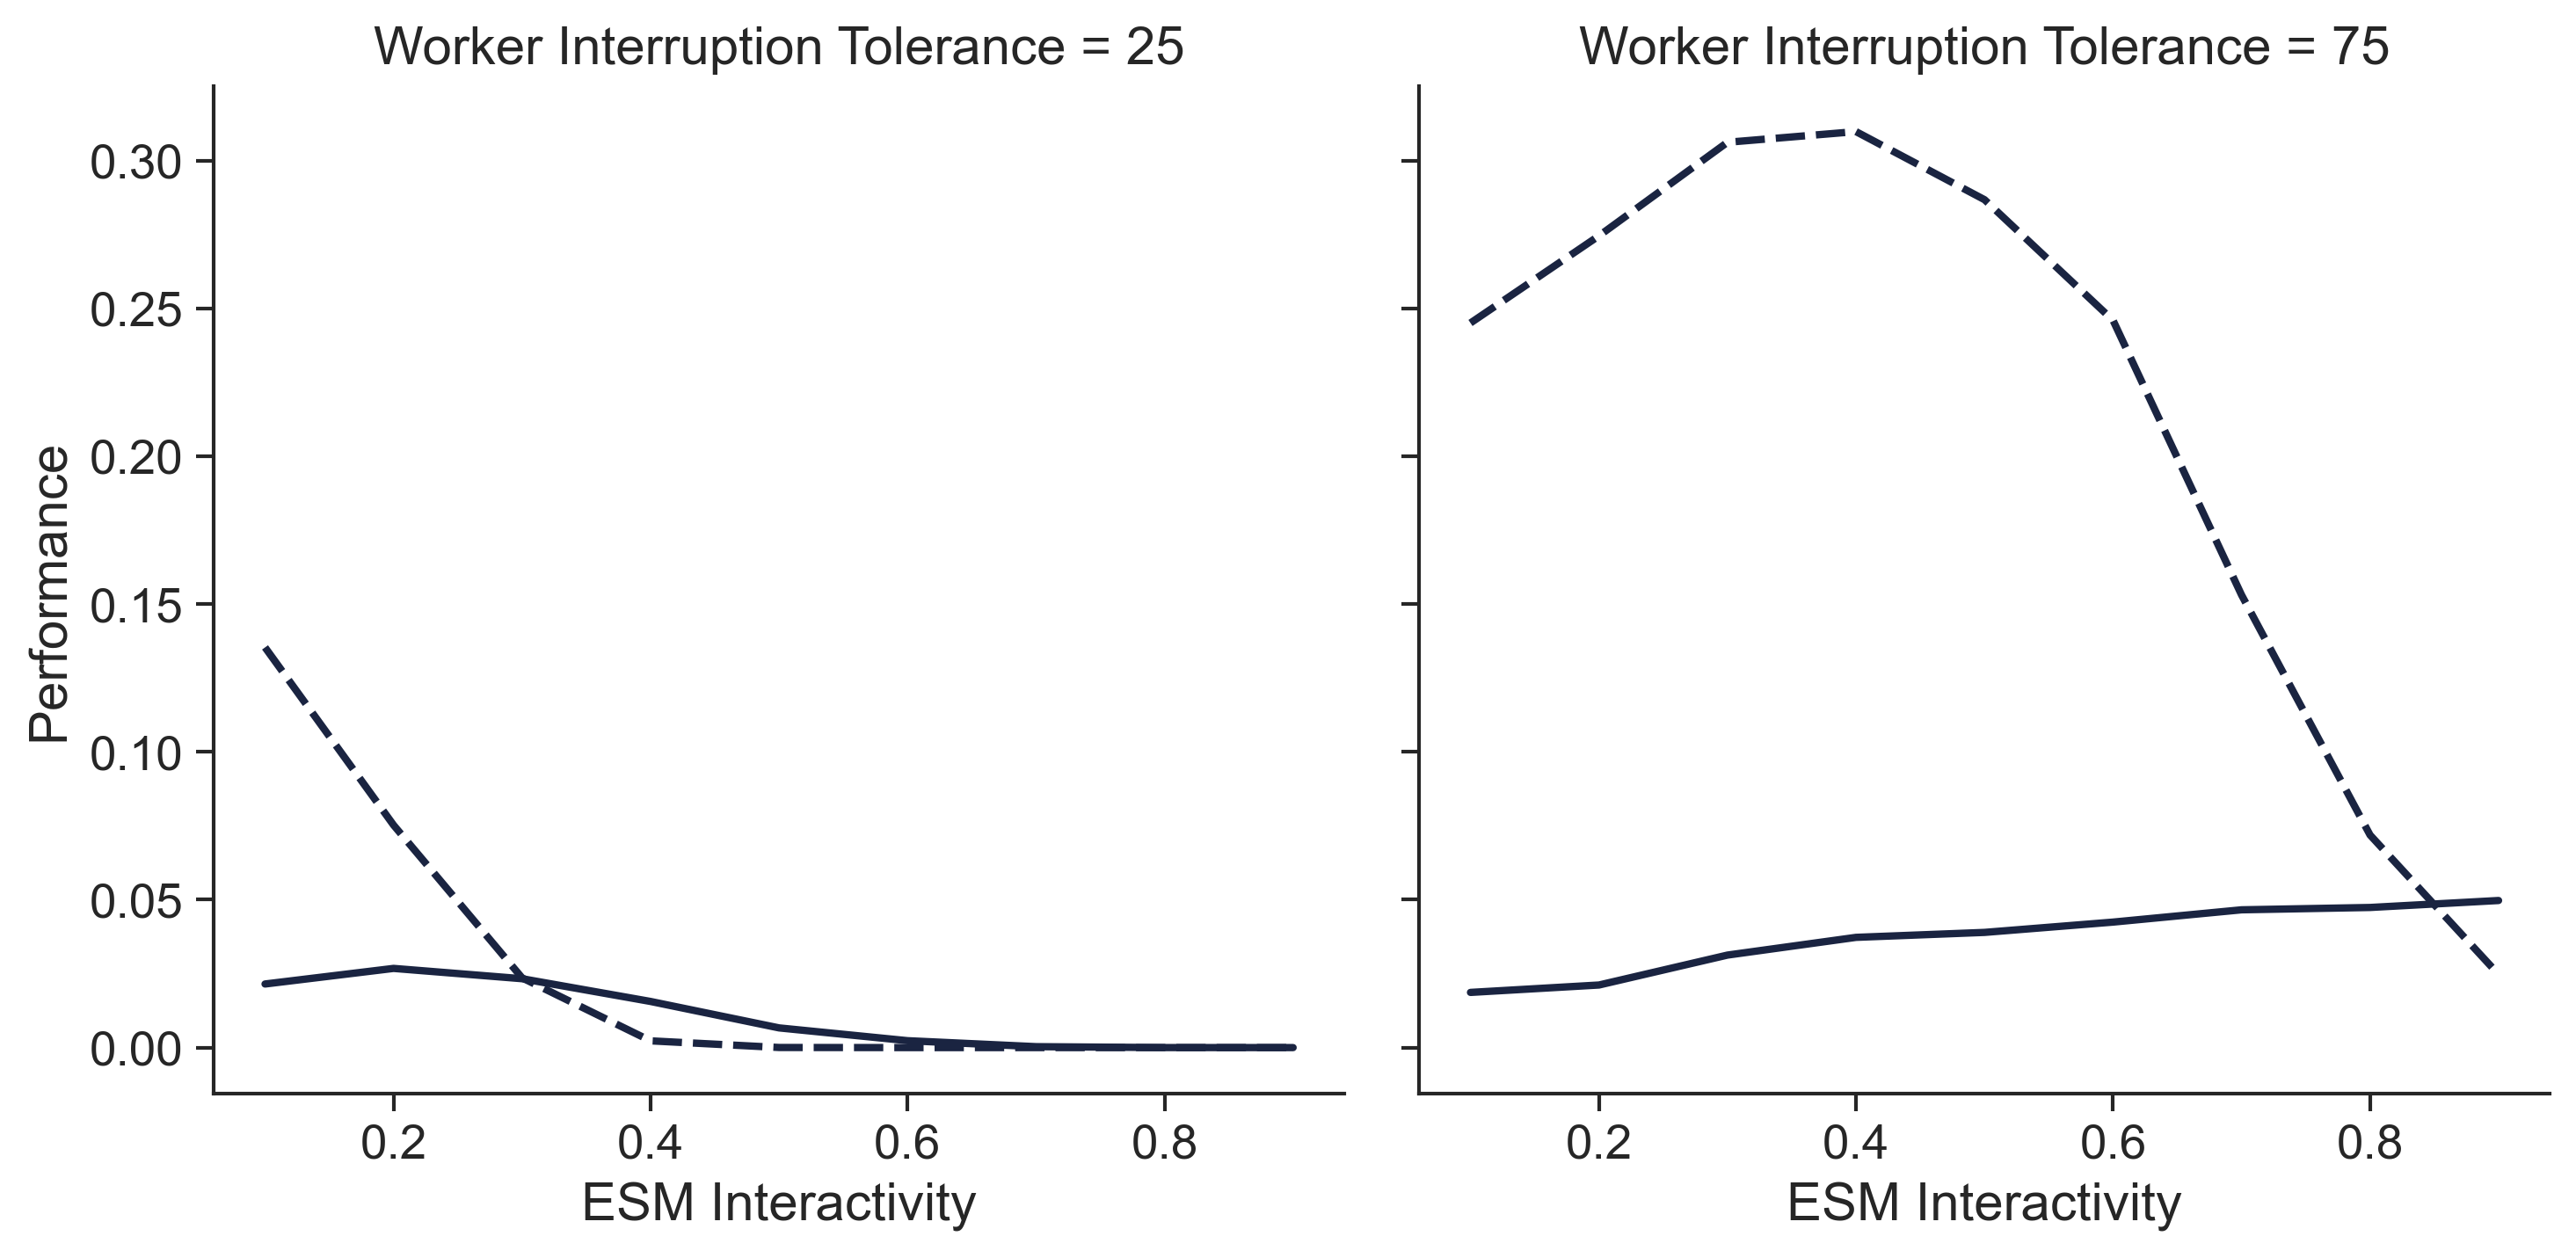

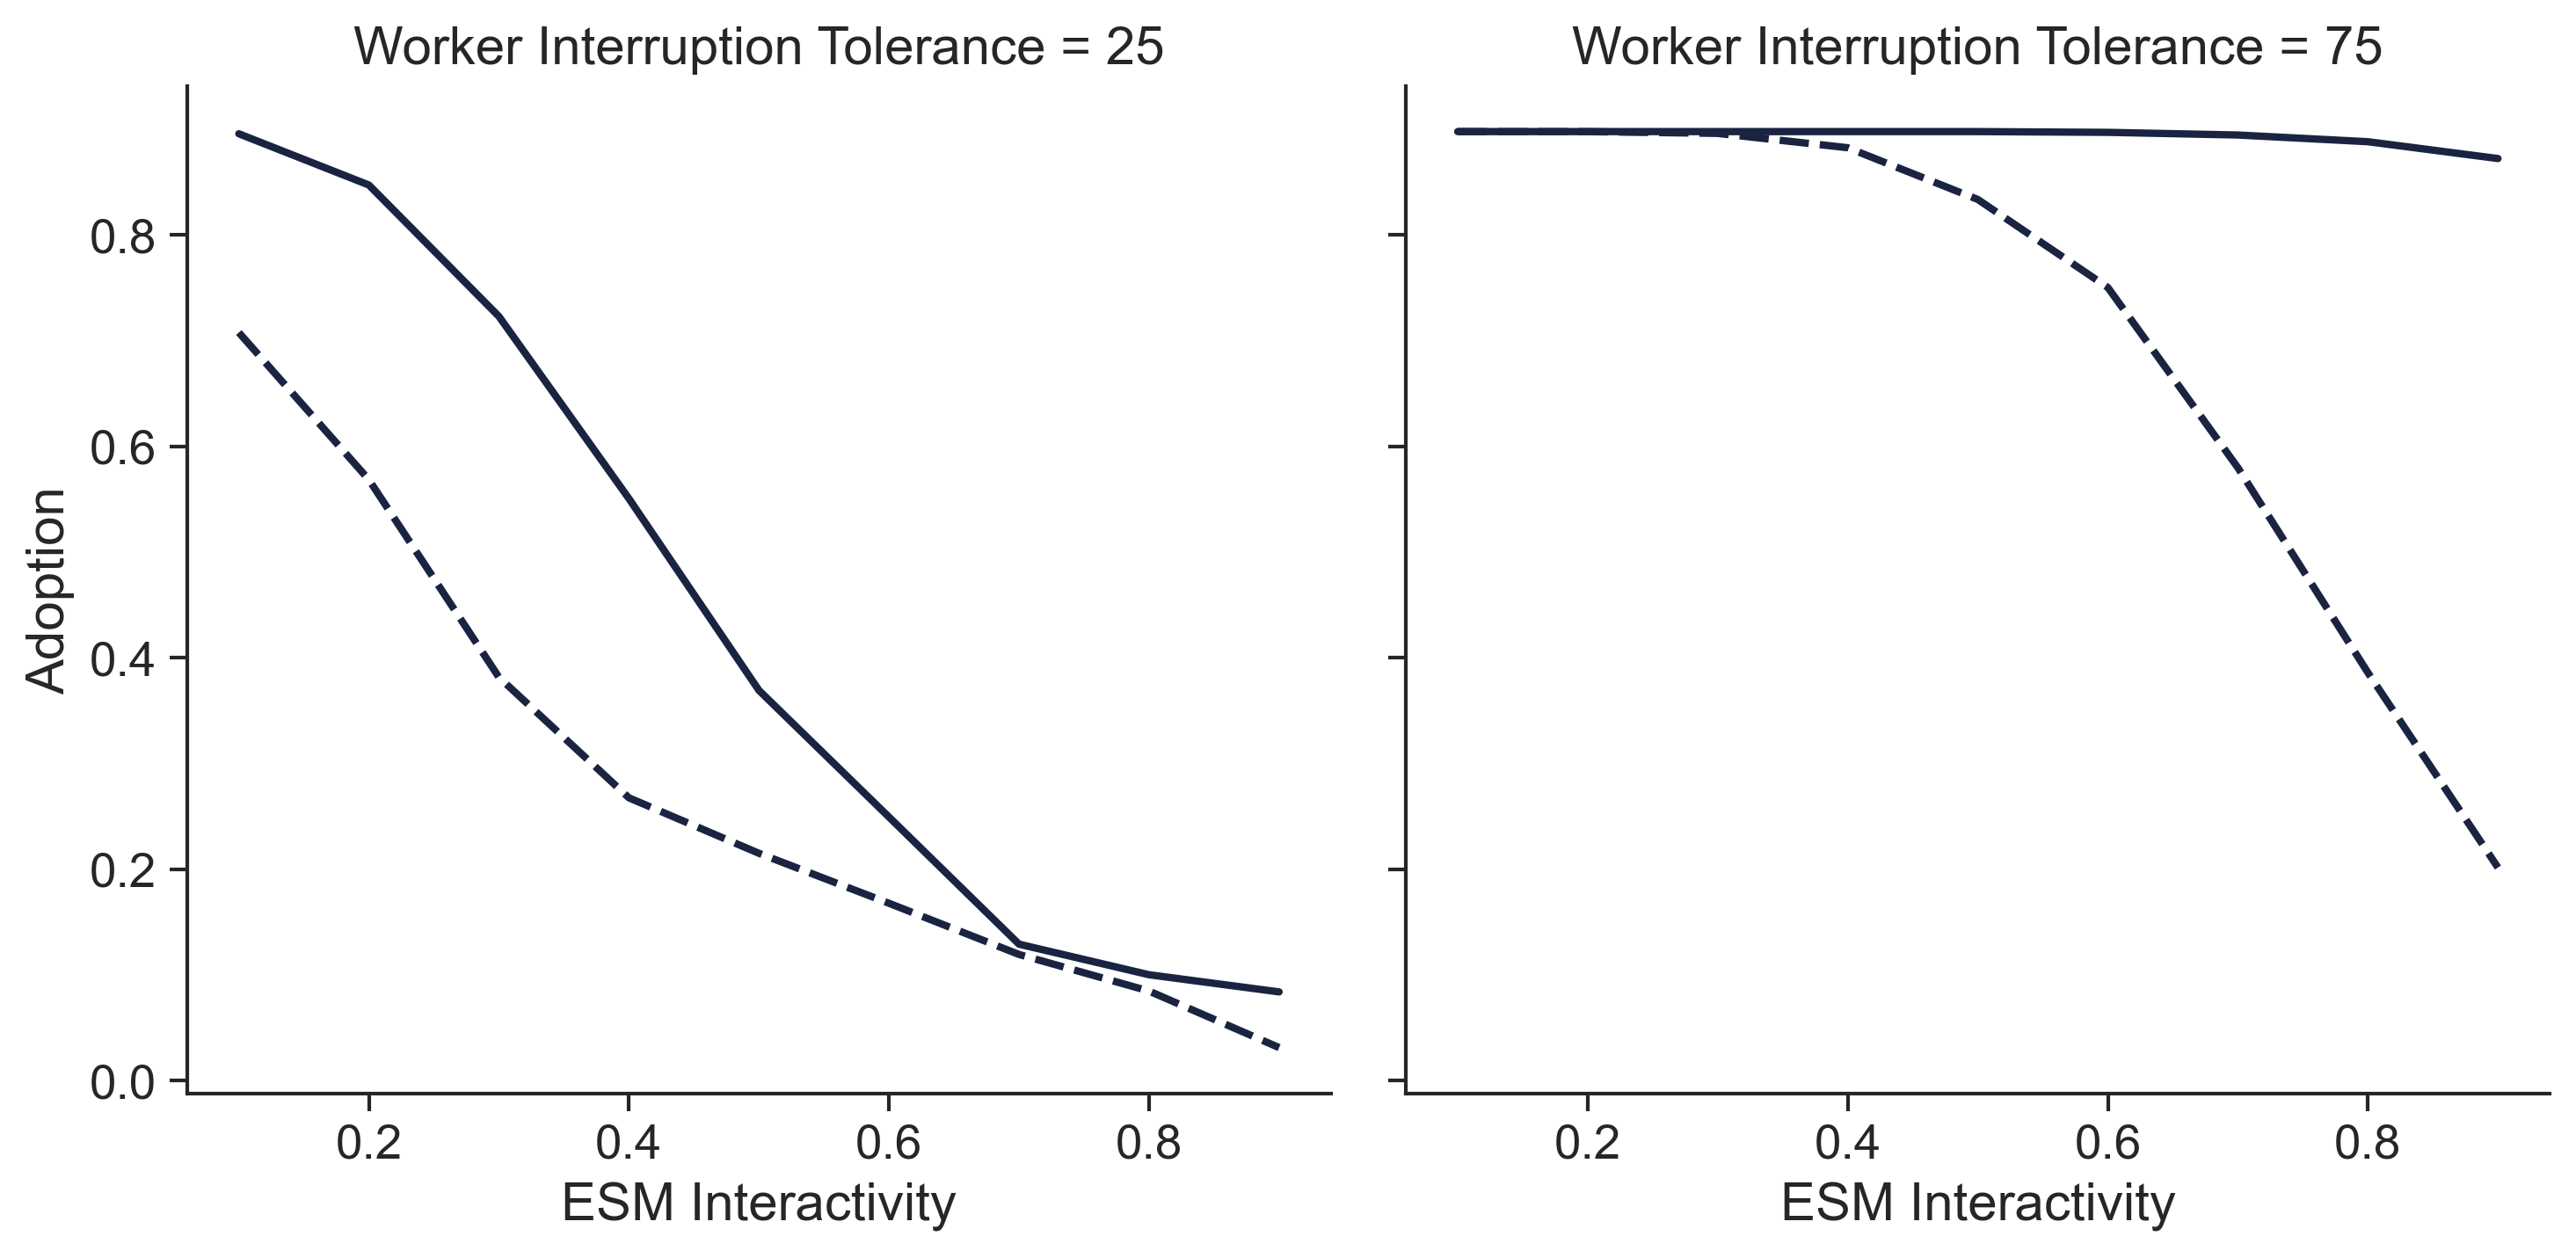

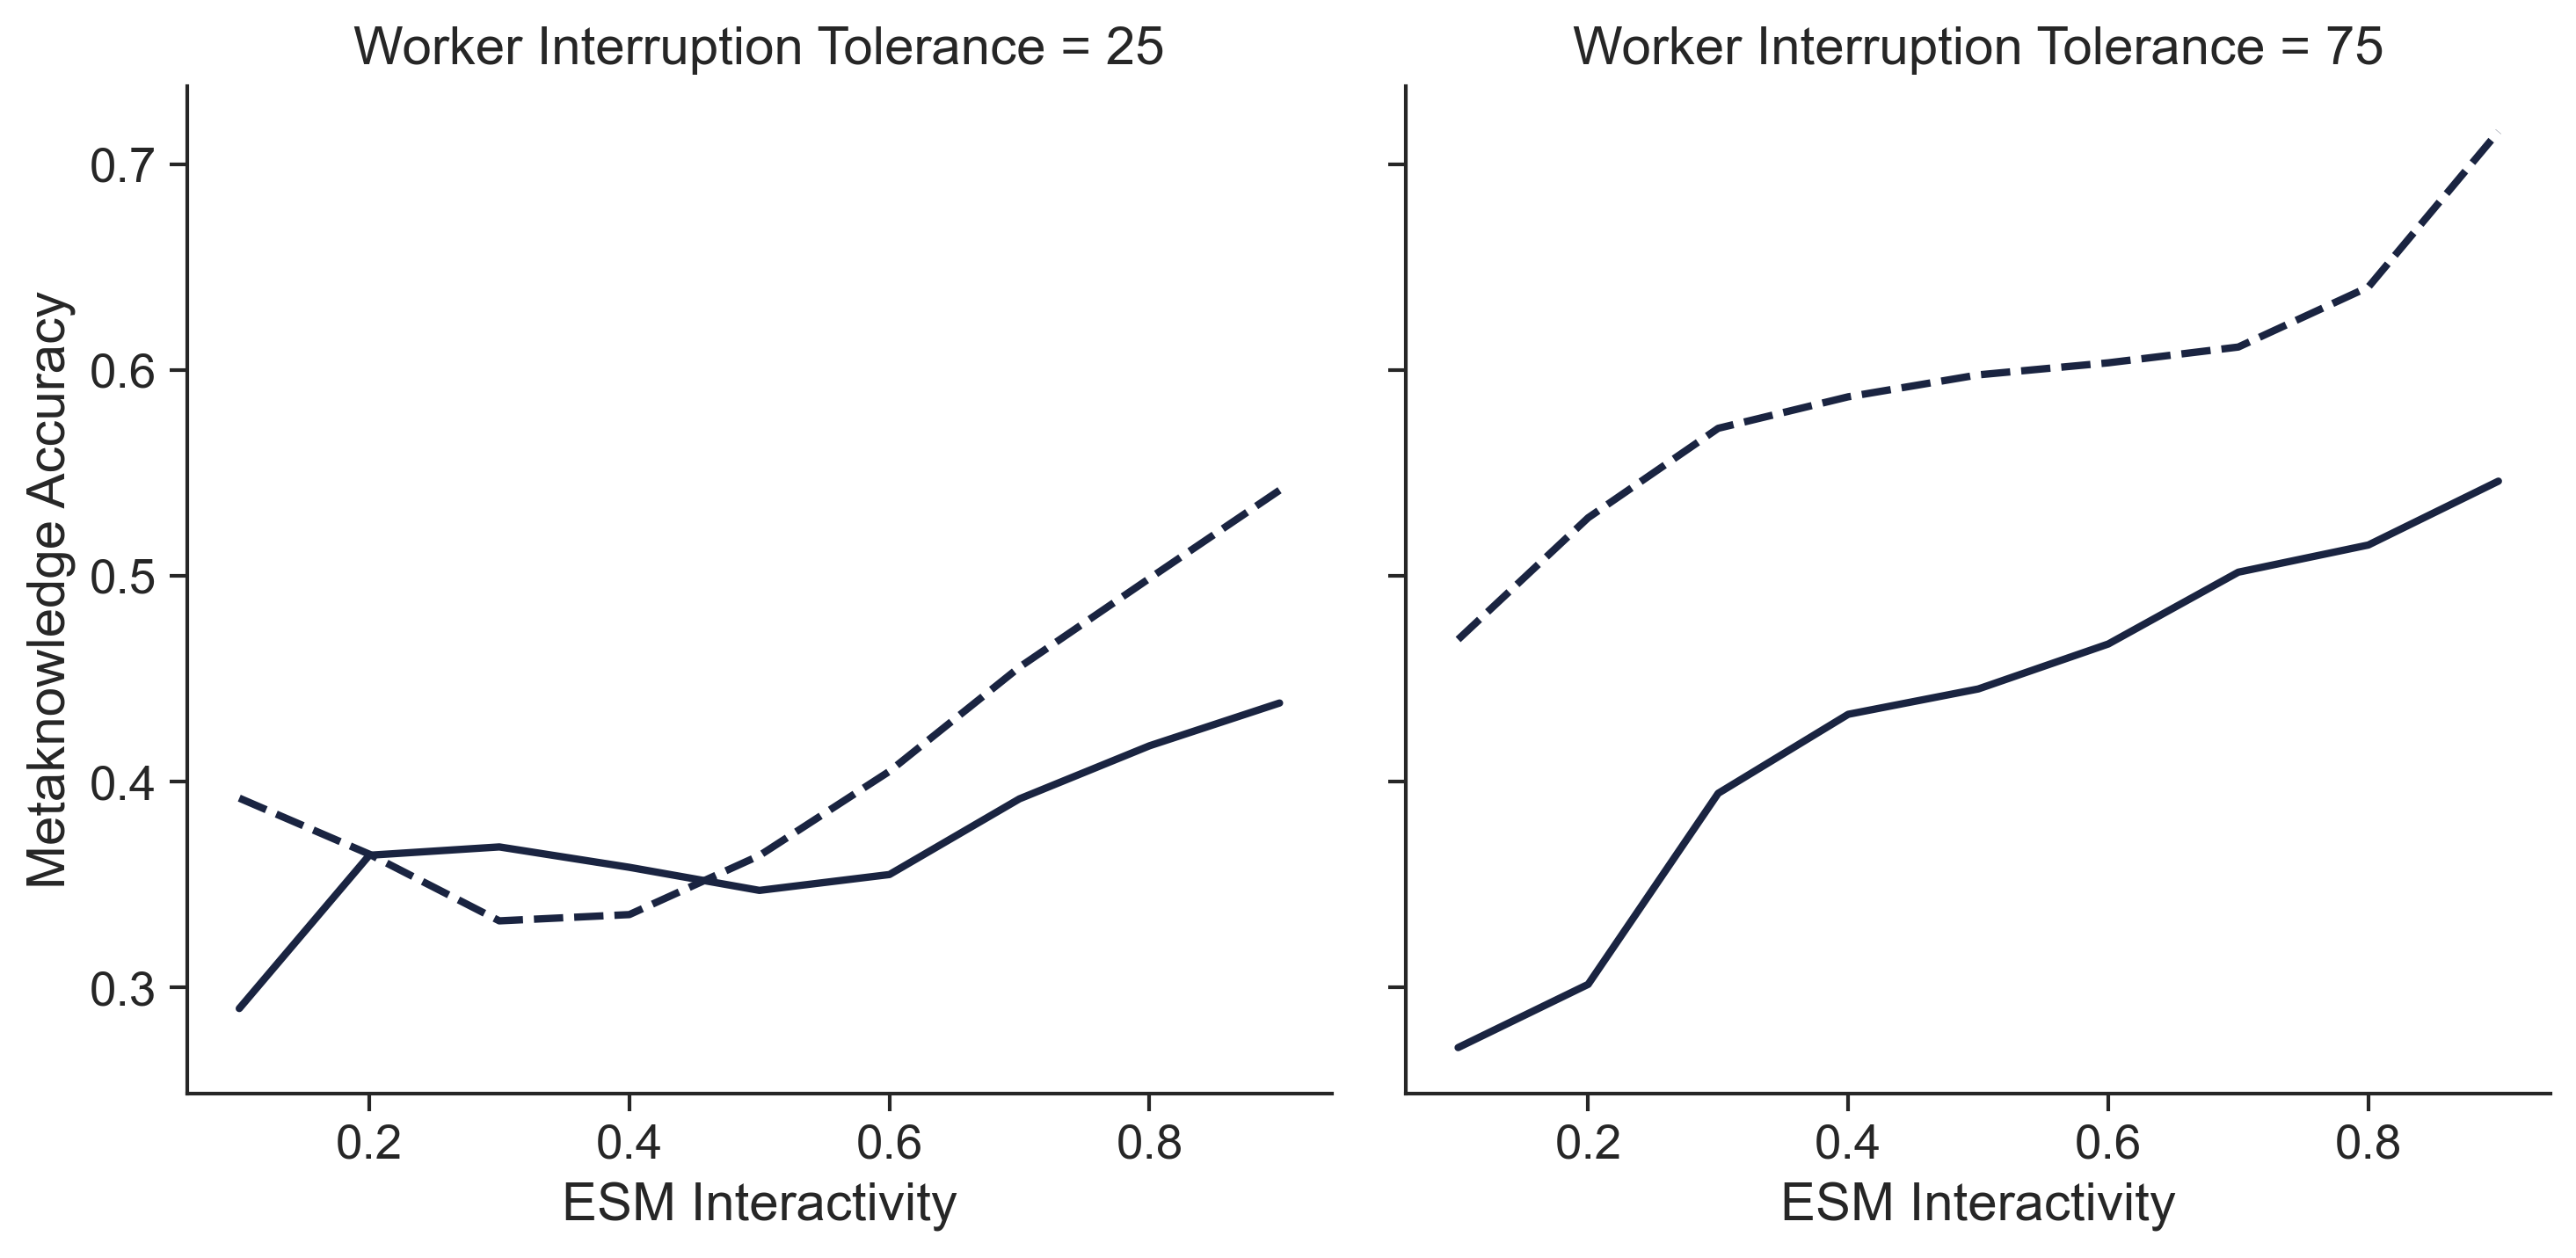

In [13]:
plot_agg2(data, legend=False)

### robustness taking in account only one configuration

(360, 21)


C:\Users\hanisaf\AppData\Local\Temp/ipykernel_18140/2556169454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ESM Interactivity'] = data['Esm Interactivity']


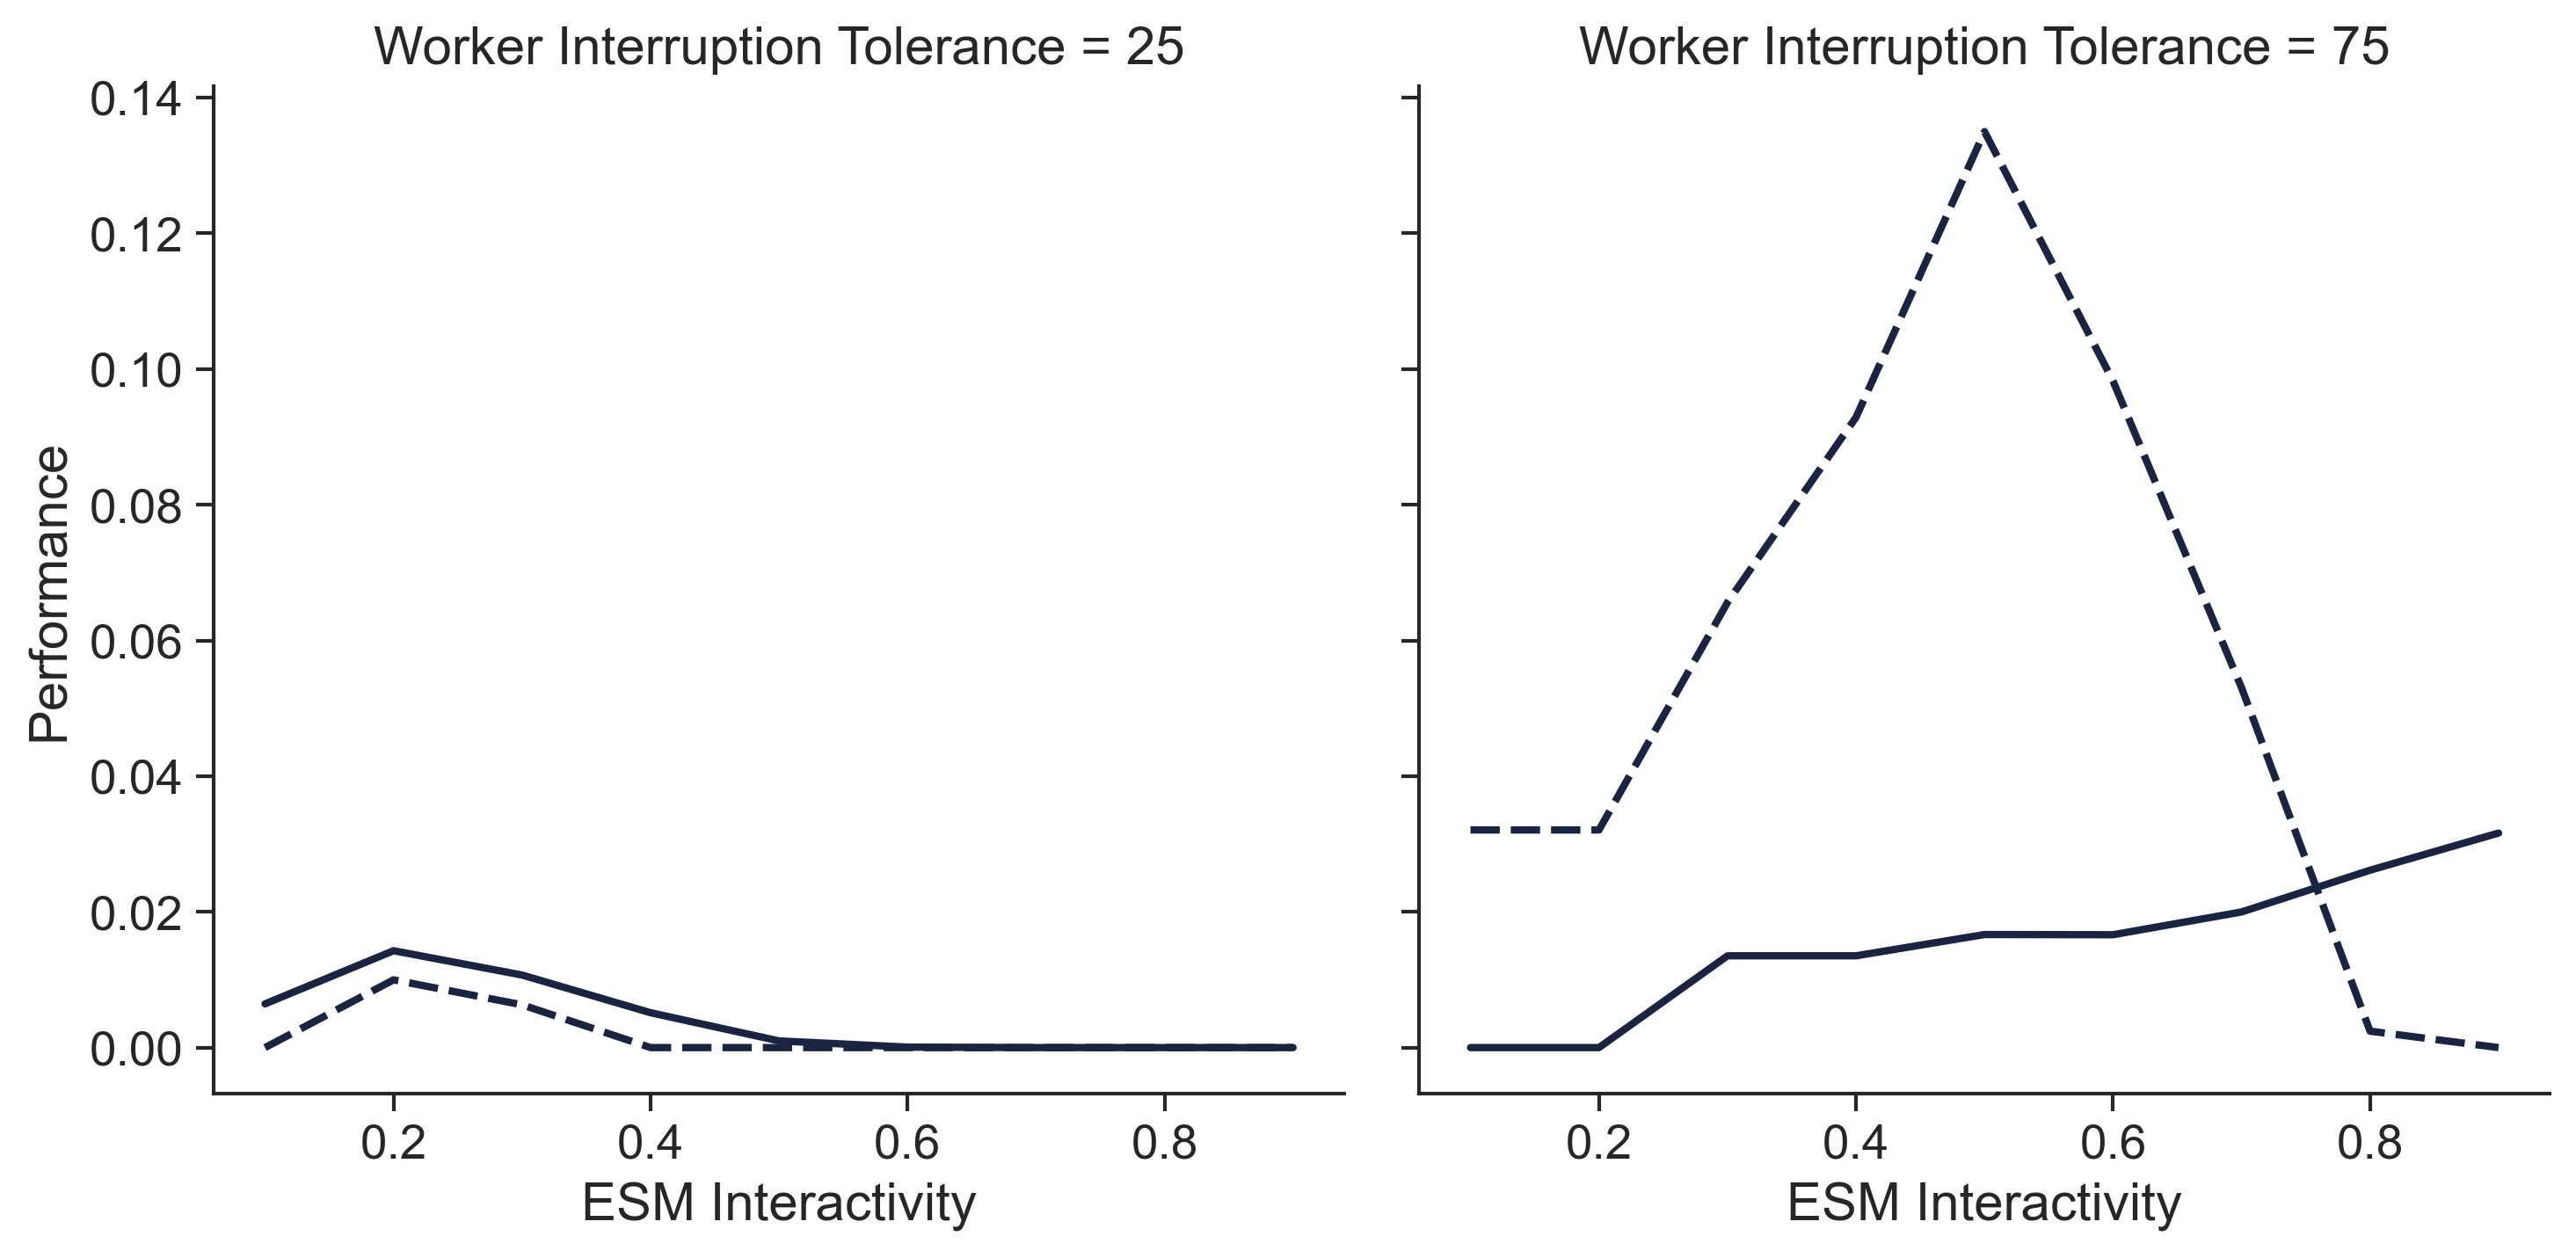

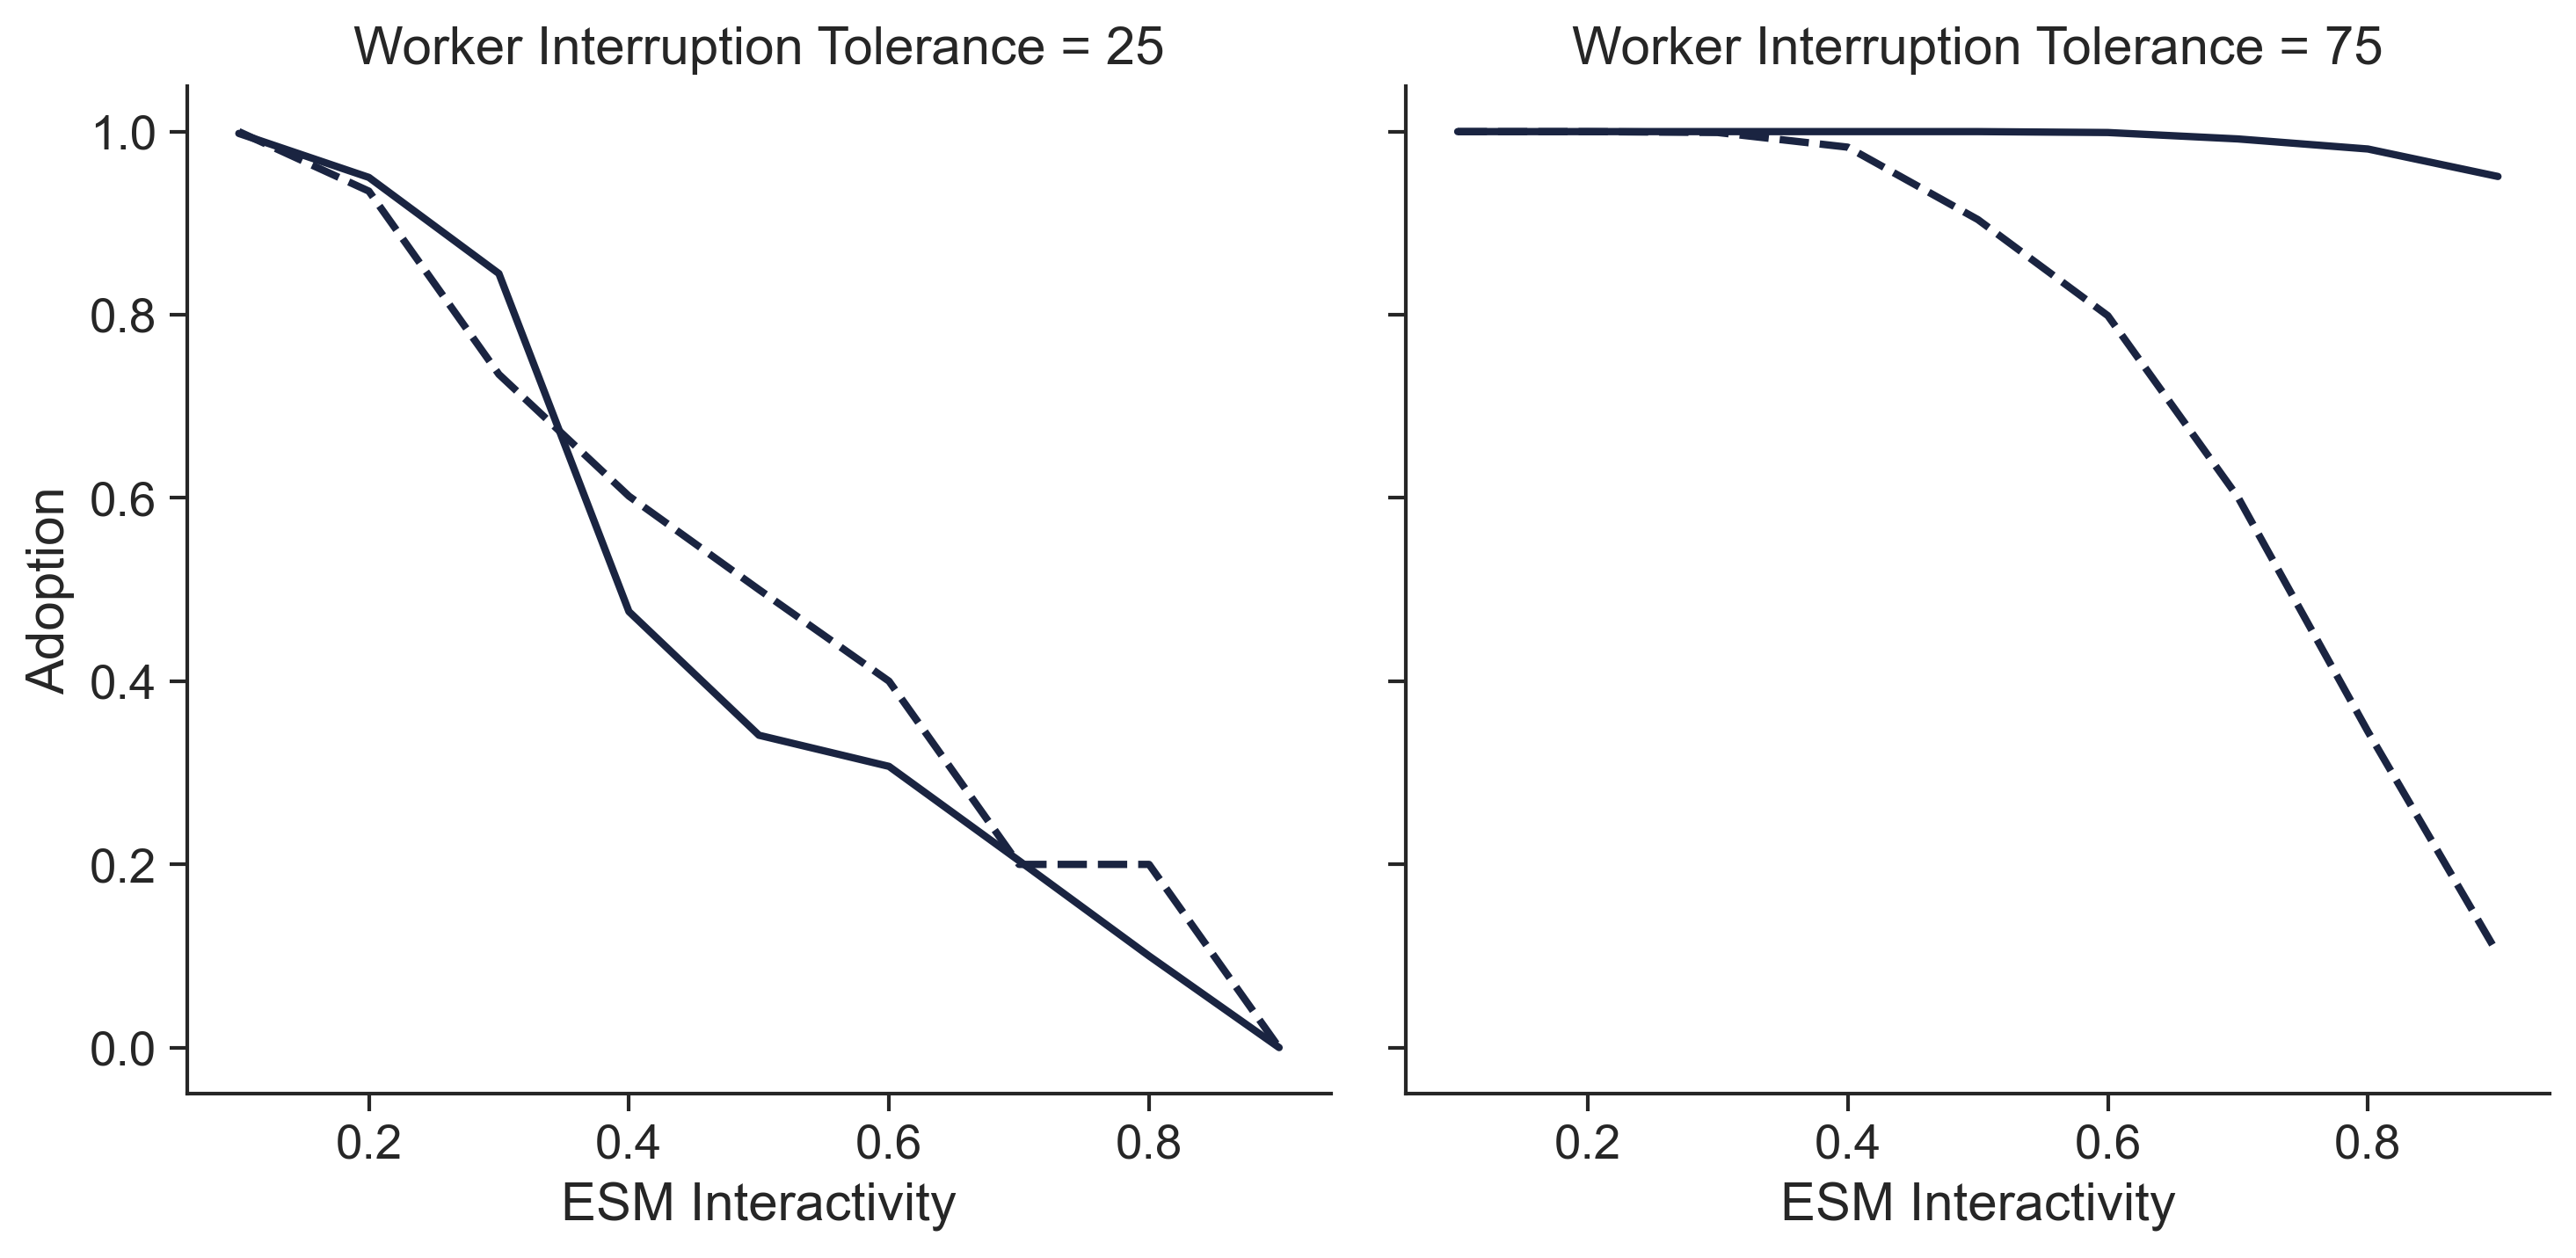

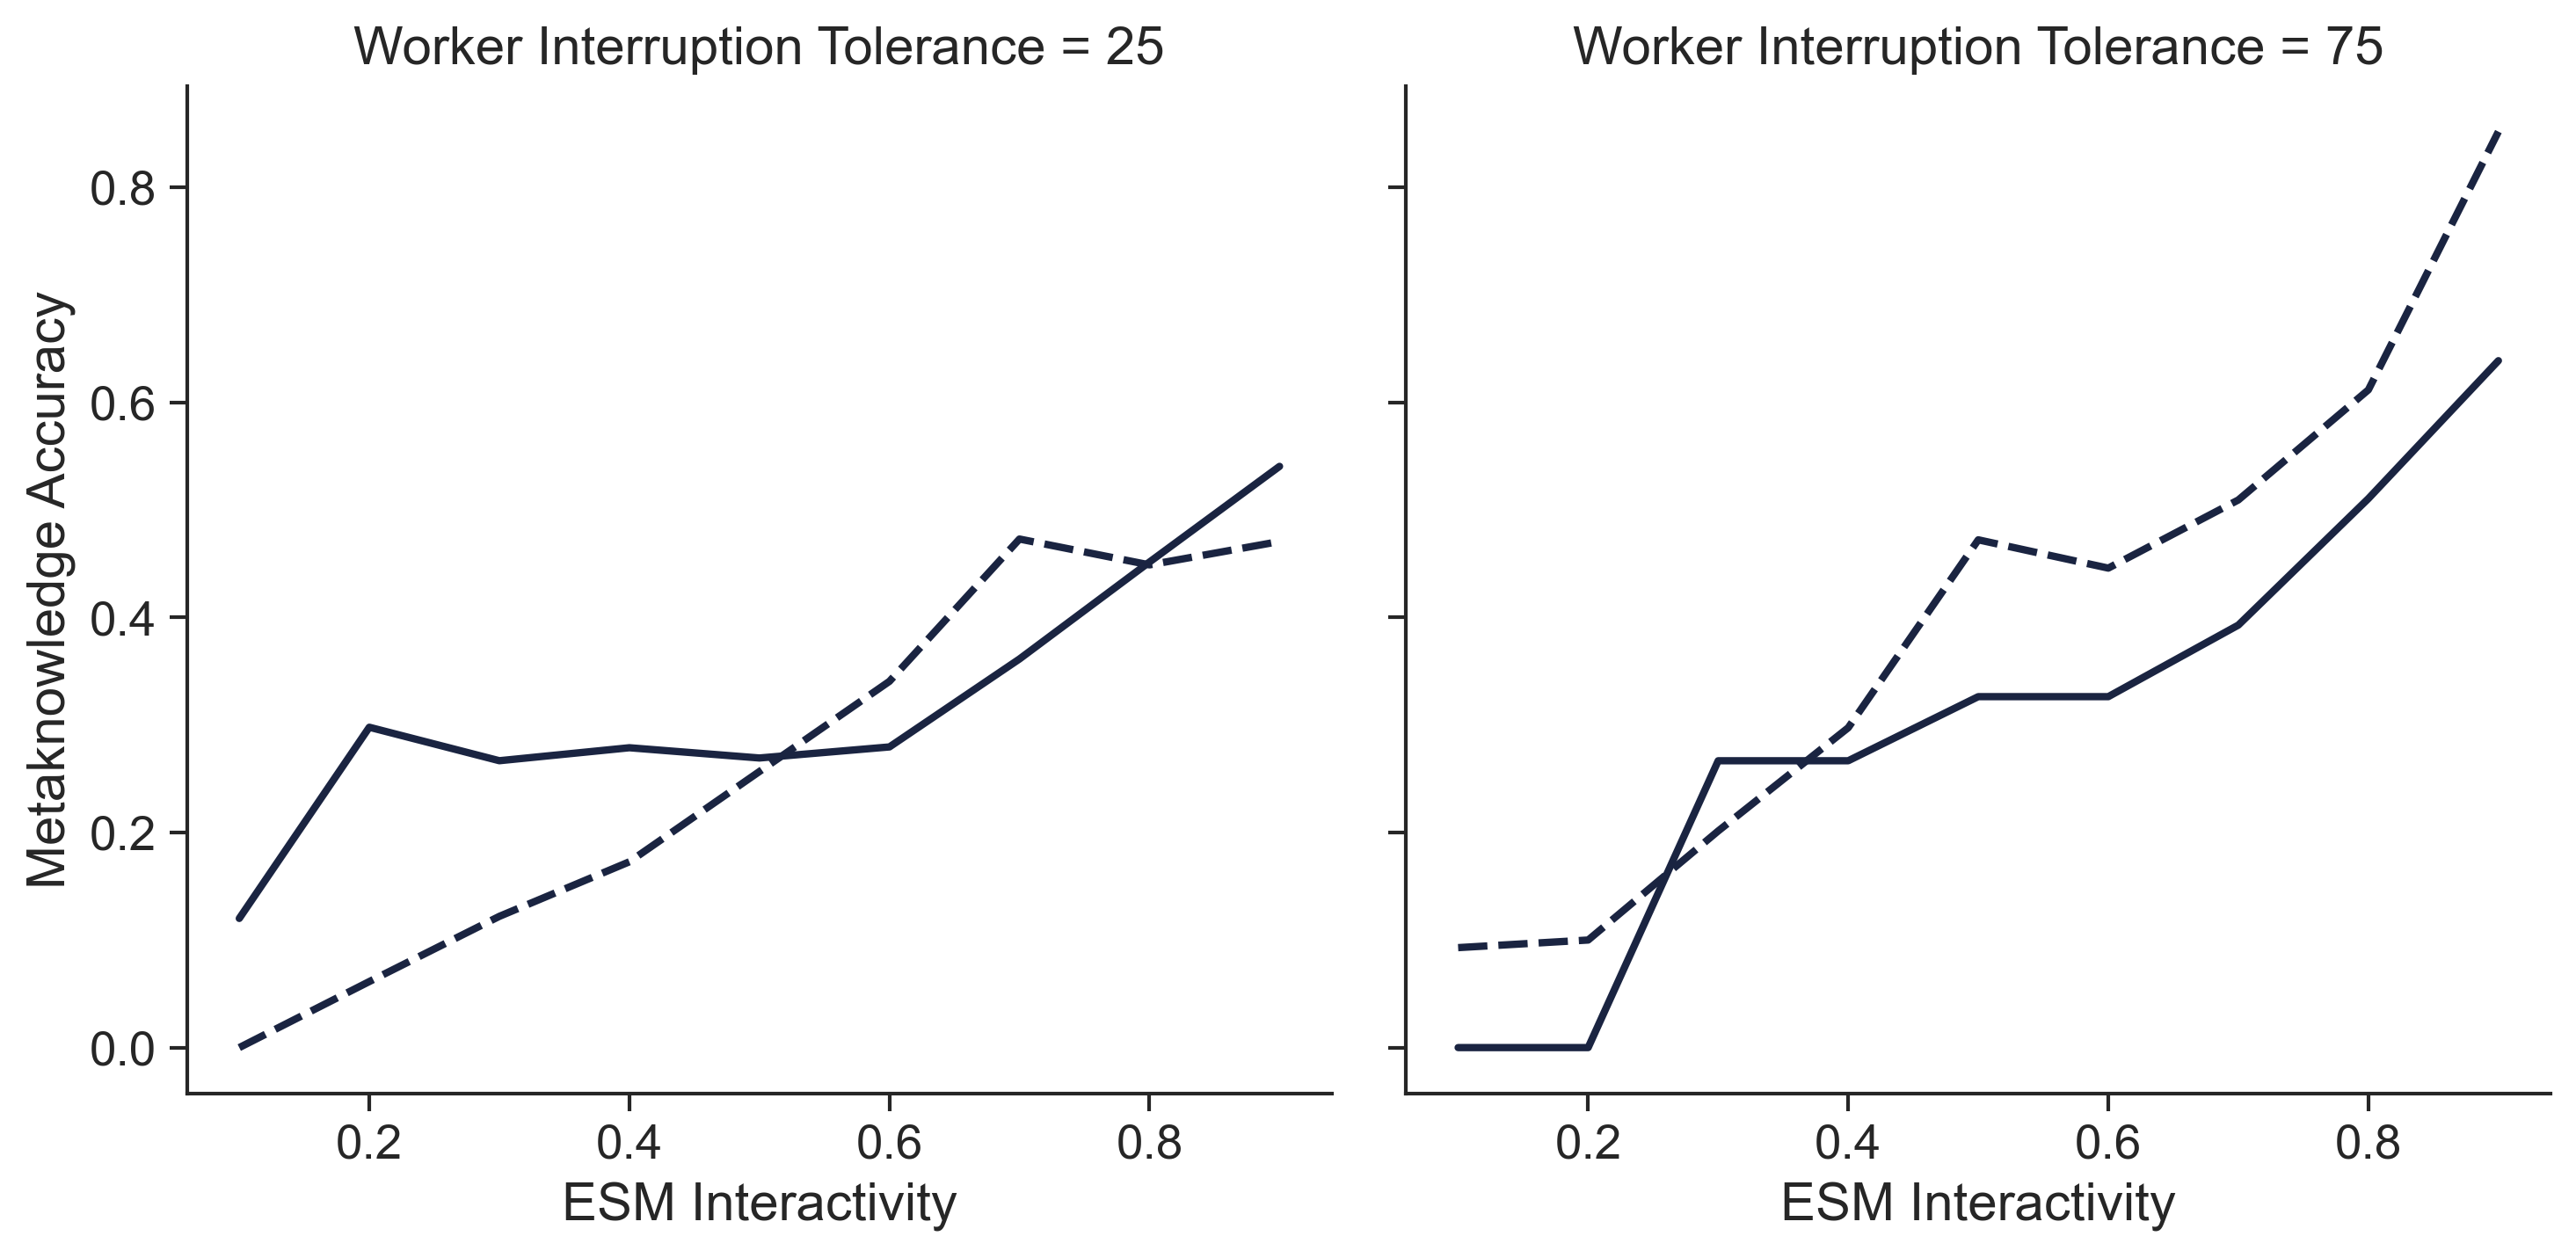

In [14]:
data0 = data[(data['Initial Metaknowledge Accuracy']==0.0) & (data['Worker Dependency']==0.3) & (data['Initial Esm Adoption']==1.0) ]
print(data0.shape)
plot_agg2(data0, legend=False)

patterns MK similar to performance but different from adtopion